In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv ('StudentsPerformance.csv',header=0)
df.rename(columns={
    'race/ethnicity' : 'group',
    'math score' : 'math_score',
    'reading score' : 'reading_score',
    'writing score' : 'writing_score',
    'parental level of education' : 'level_education',
    'test preparation course' : 'test_preparation_course'
},inplace=True)

In [98]:
columns = ['math_score','reading_score','writing_score']
#AVERAGE MATH_SCORE,READING_SCORE,AND WRITING_SCORE
df['average'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3 
df

,gender,group,level_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


#### 1. Bagaimana cara meningkatkan kinerja siswa dalam setiap tes?
#### 2. Apa faktor utama yang mempengaruhi nilai ujian?
#### 3. Efektivitas kursus persiapan ujian?
#### 4. Kesimpulan lainnya

# OVERALL

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   1000 non-null   object 
 1   group                    1000 non-null   object 
 2   level_education          1000 non-null   object 
 3   lunch                    1000 non-null   object 
 4   test_preparation_course  1000 non-null   object 
 5   math_score               1000 non-null   int64  
 6   reading_score            1000 non-null   int64  
 7   writing_score            1000 non-null   int64  
 8   average                  1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [100]:
df.describe(include='all')

,gender,group,level_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,67.770667
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,14.257326
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,9.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,58.333333
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,68.333333
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,77.666667


## THE TOP AVARAGE SCORE

In [101]:
df[df.average == df.average.max()]

,gender,group,level_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
458,female,group E,bachelor's degree,standard,none,100,100,100,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.0
962,female,group E,associate's degree,standard,none,100,100,100,100.0


## THE BOTTOM AVARAGE SCORE

In [102]:
df[df.average == df.average.min()]

,gender,group,level_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
59,female,group C,some high school,free/reduced,none,0,17,10,9.0


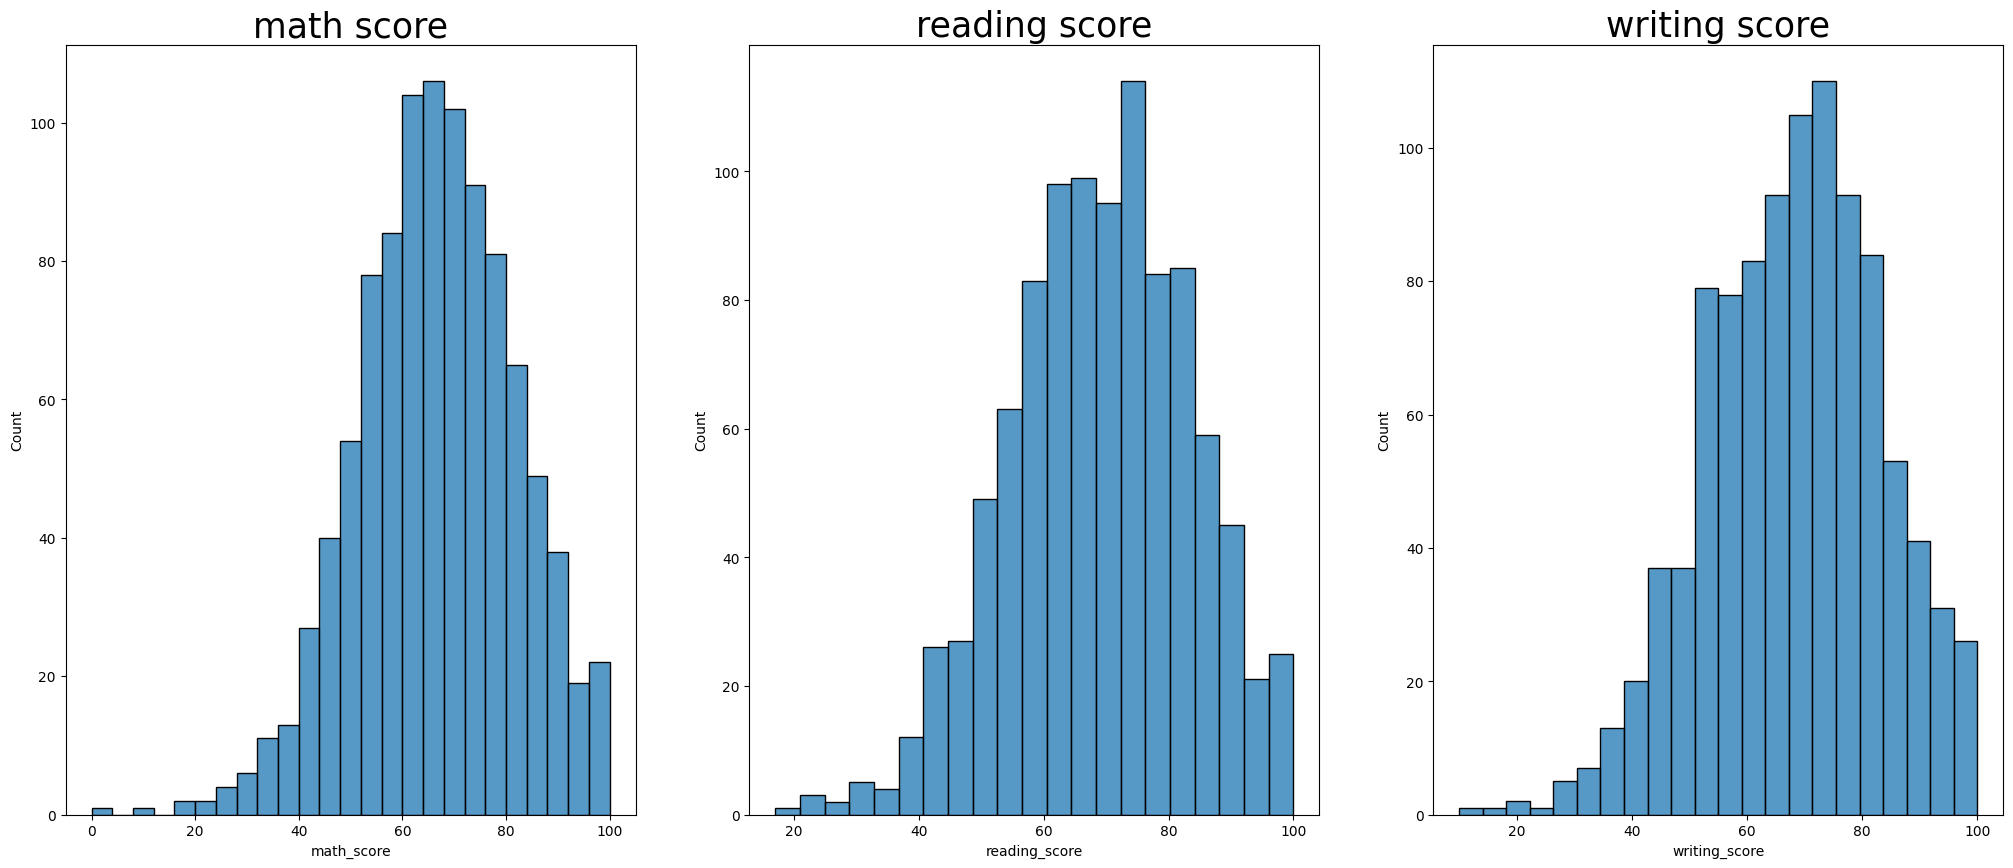

In [103]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))

sns.histplot(df['math_score'],ax=ax[0])
ax[0].set_title('math score',fontsize=25)
sns.histplot(df['reading_score'],ax=ax[1])
ax[1].set_title('reading score',fontsize=25)
sns.histplot(df['writing_score'],ax=ax[2])
ax[2].set_title('writing score',fontsize=25)
plt.show()

## CORELLATION

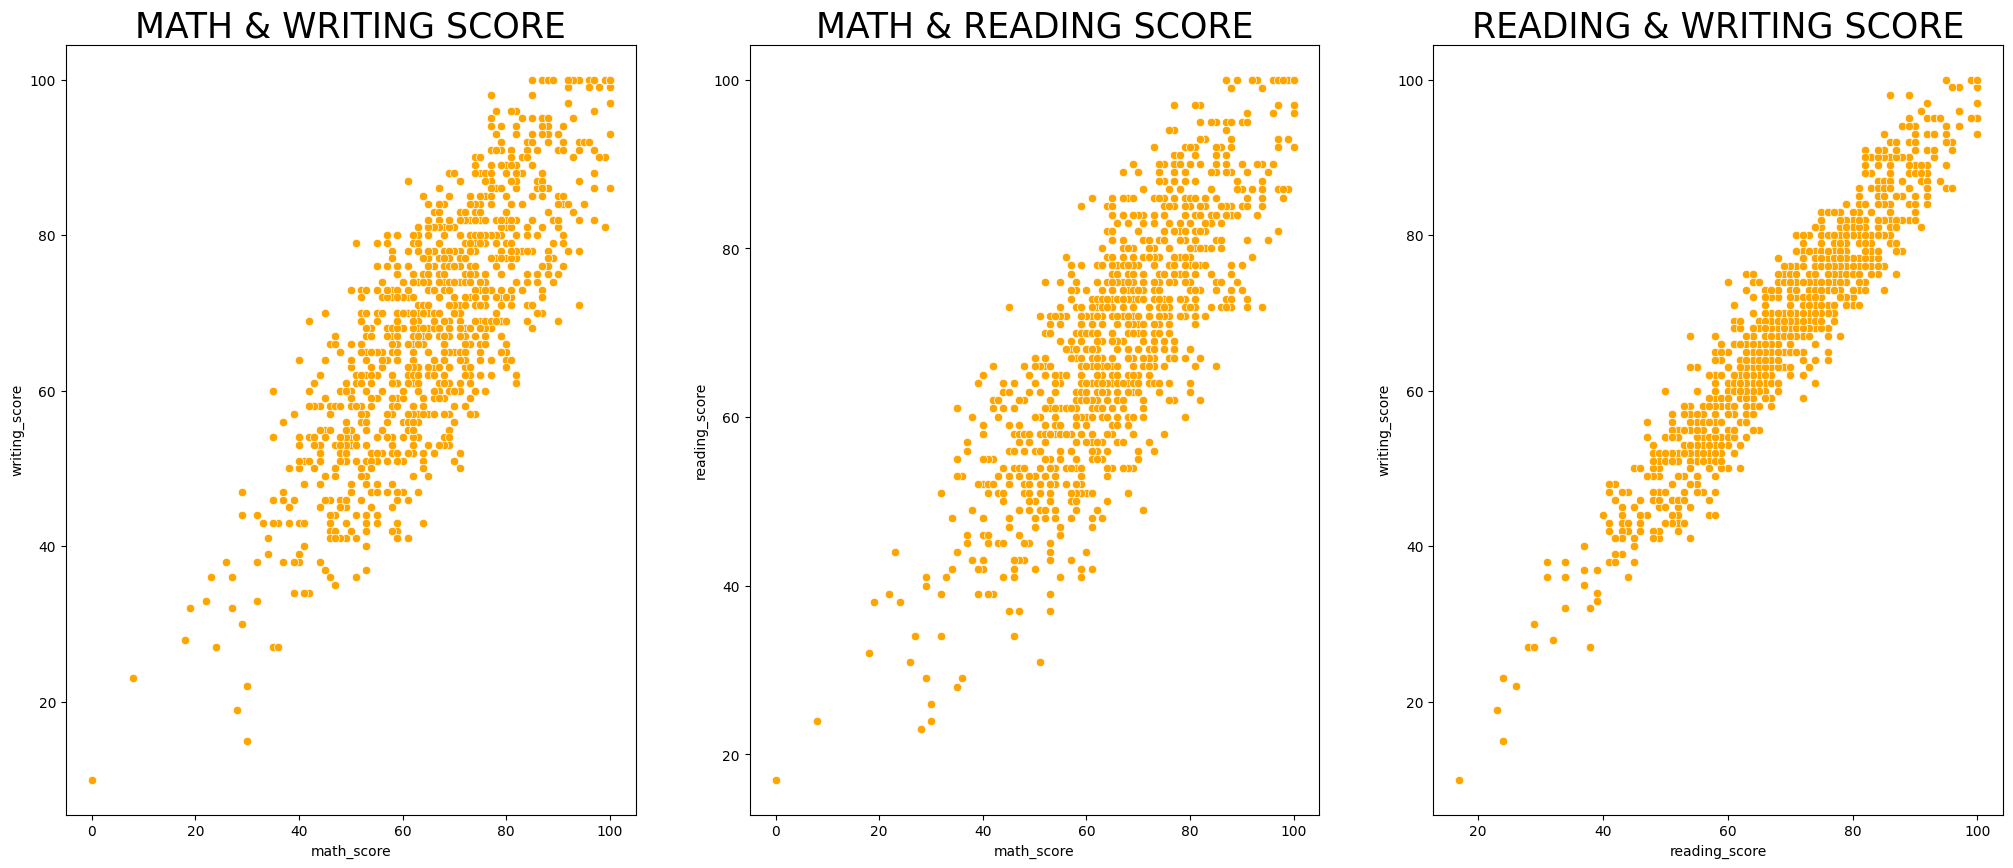

In [104]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.scatterplot(x='math_score',y='writing_score',data=df,color='orange',ax=ax[0])
ax[0].set_title('MATH & WRITING SCORE',fontsize=25)
sns.scatterplot(x='math_score',y='reading_score',data=df,color='orange',ax=ax[1])
ax[1].set_title('MATH & READING SCORE',fontsize=25)
sns.scatterplot(x='reading_score',y='writing_score',data=df,color='orange',ax=ax[2])
ax[2].set_title('READING & WRITING SCORE',fontsize=25)
plt.show()

### GENDER

   gender  count
0  female    518
1    male    482


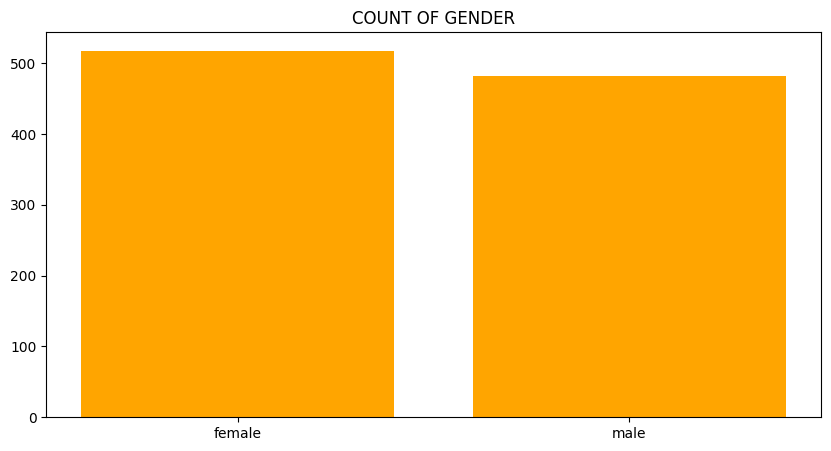

In [105]:
gender = df['gender'].value_counts(ascending=False).reset_index()
print(gender)
plt.figure(figsize=(10,5))
plt.bar(gender['gender'],gender['count'],color='orange')
plt.title('COUNT OF GENDER')
plt.show()

### GROUP/ETHNICITY

     group  count
0  group C    319
1  group D    262
2  group B    190
3  group E    140
4  group A     89


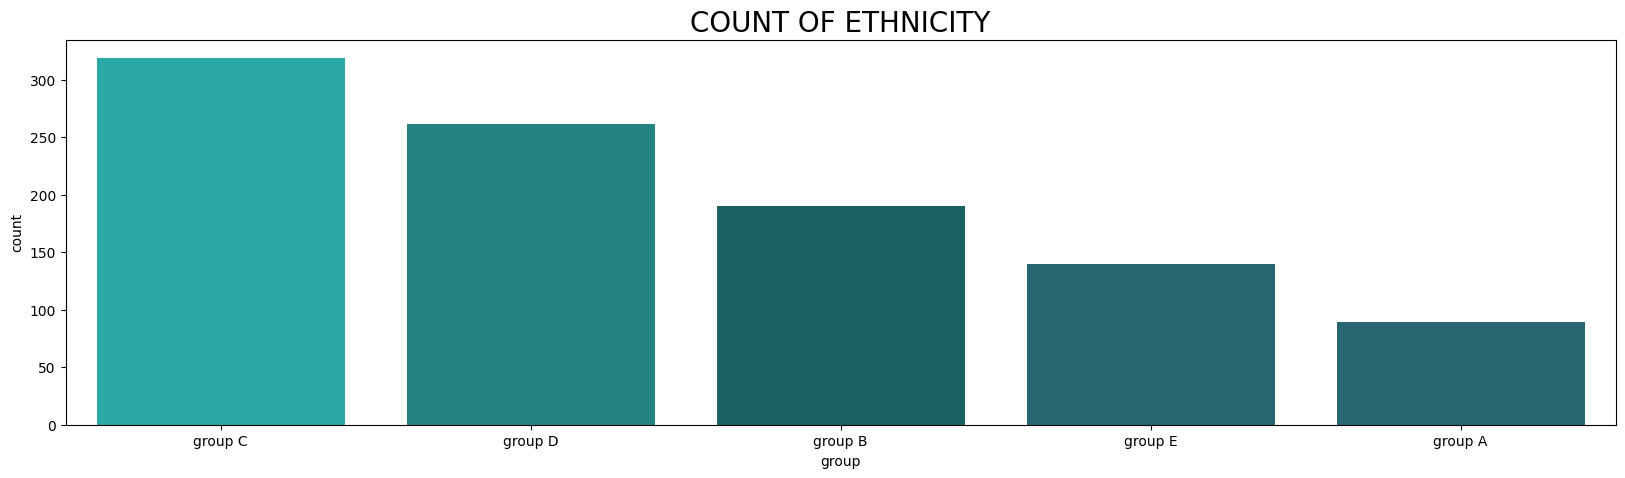

In [106]:
ethnicity = df['group'].value_counts().reset_index()
print(ethnicity)
color_n = ['#17BEBB','#139492','#0E6E6D','#1C6E7D','#1C6E7D']
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(20,5))
sns.barplot(x='group',y='count',data=ethnicity.sort_values(by='count',ascending=False),palette=color_n)
ax.set_title('COUNT OF ETHNICITY',fontsize=20)
plt.show()

### PARENTAL OF LEVEL EDUCATION

      level_education  count
0        some college    226
1  associate's degree    222
2         high school    196
3    some high school    179
4   bachelor's degree    118
5     master's degree     59


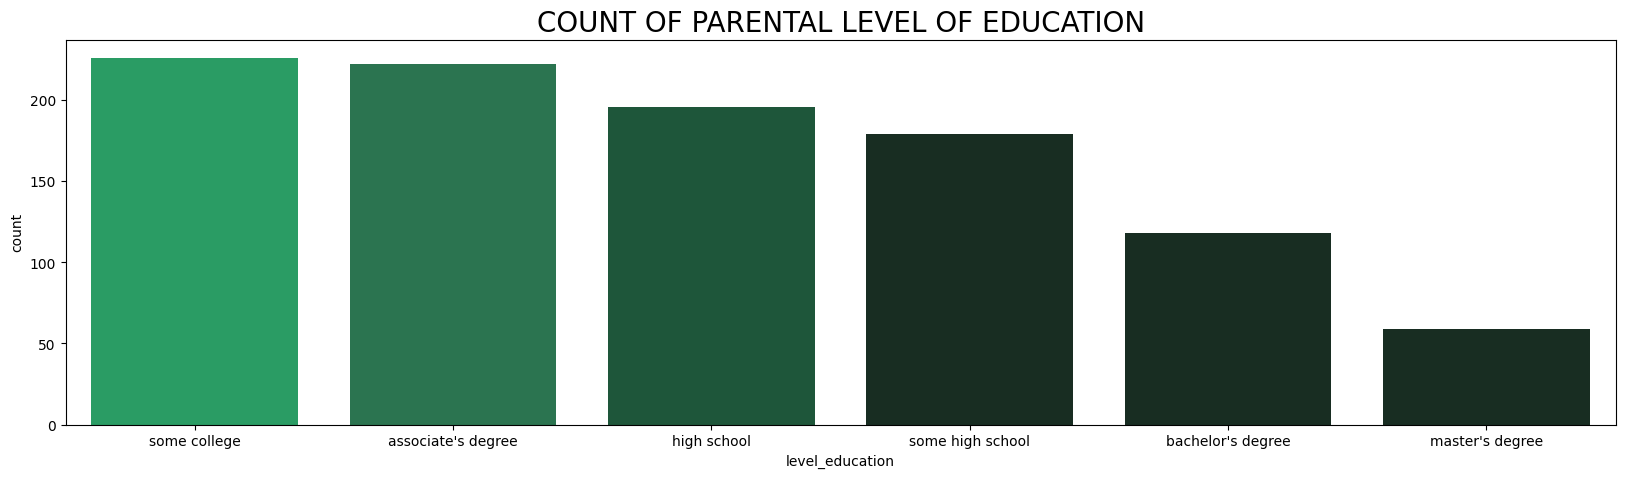

In [107]:
education = df['level_education'].value_counts().reset_index()
print(education)
color = ['#17AF64','#1F8050','#155F3A','#143022','#143022','#143022','#143022','#143022']
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(20,5))
sns.barplot(x='level_education',y='count',data=education.sort_values(by='count',ascending=False),palette=color)
ax.set_title('COUNT OF PARENTAL LEVEL OF EDUCATION',fontsize=20)
plt.show()

### LUNCH

          lunch  count
0      standard    645
1  free/reduced    355


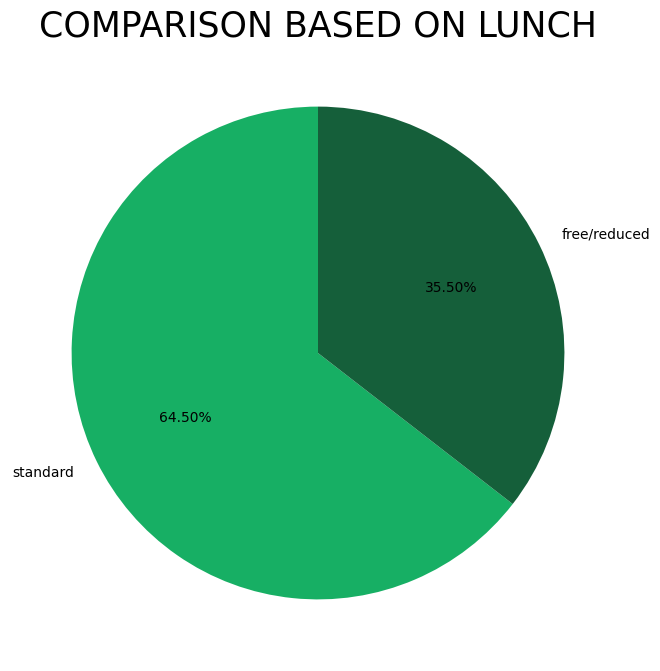

In [159]:
lunch = df['lunch'].value_counts().reset_index()
print(lunch)
plt.figure(figsize=(10,8))
plt.pie(lunch['count'],labels=lunch['lunch'],
       startangle=90,autopct='%1.2f%%',
       colors=['#17AF64','#155F3A'])
plt.title('COMPARISON BASED ON LUNCH',fontsize=25)
plt.show()

### TEST PREPARATION COURSE

  test_preparation_course  count
0                    none    642
1               completed    358


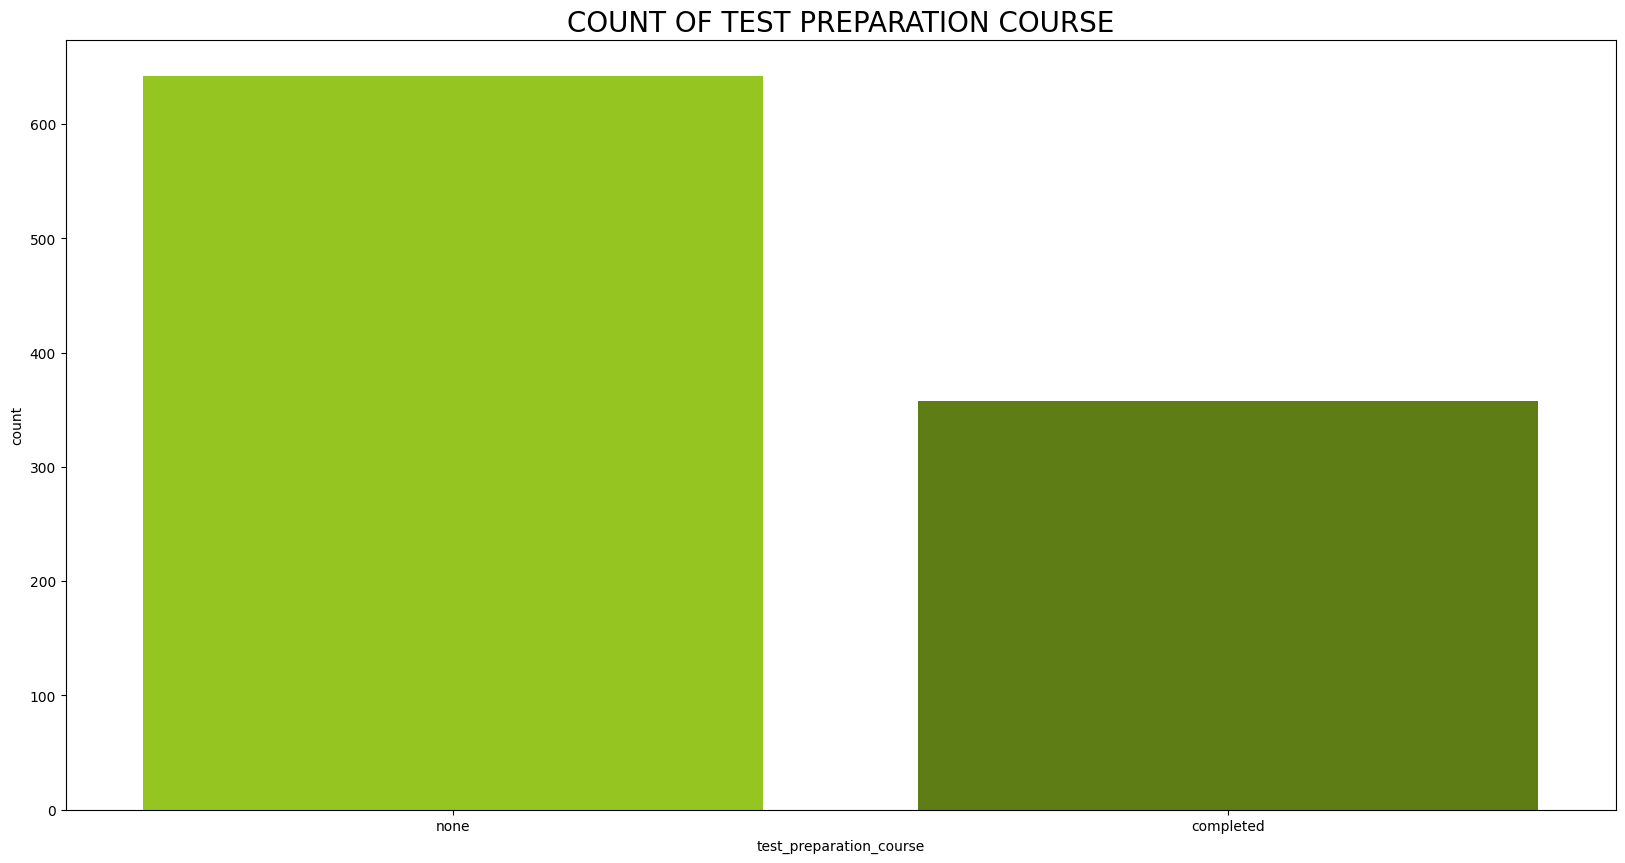

In [109]:
preparation = df['test_preparation_course'].value_counts().reset_index()
print(preparation)
colors = ['#A1E005','#668E04']
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20,10))
sns.barplot(x='test_preparation_course',y='count',data=preparation.sort_values(by='count',ascending=False),palette=colors)
ax.set_title('COUNT OF TEST PREPARATION COURSE',fontsize=20)
plt.show()

# 1. Based On GENDER

In [110]:
#add dataset
male = df.loc[(df['gender']=='male')]
famale = df.loc[(df['gender']=='female')]

## Male

BASED ON MALE


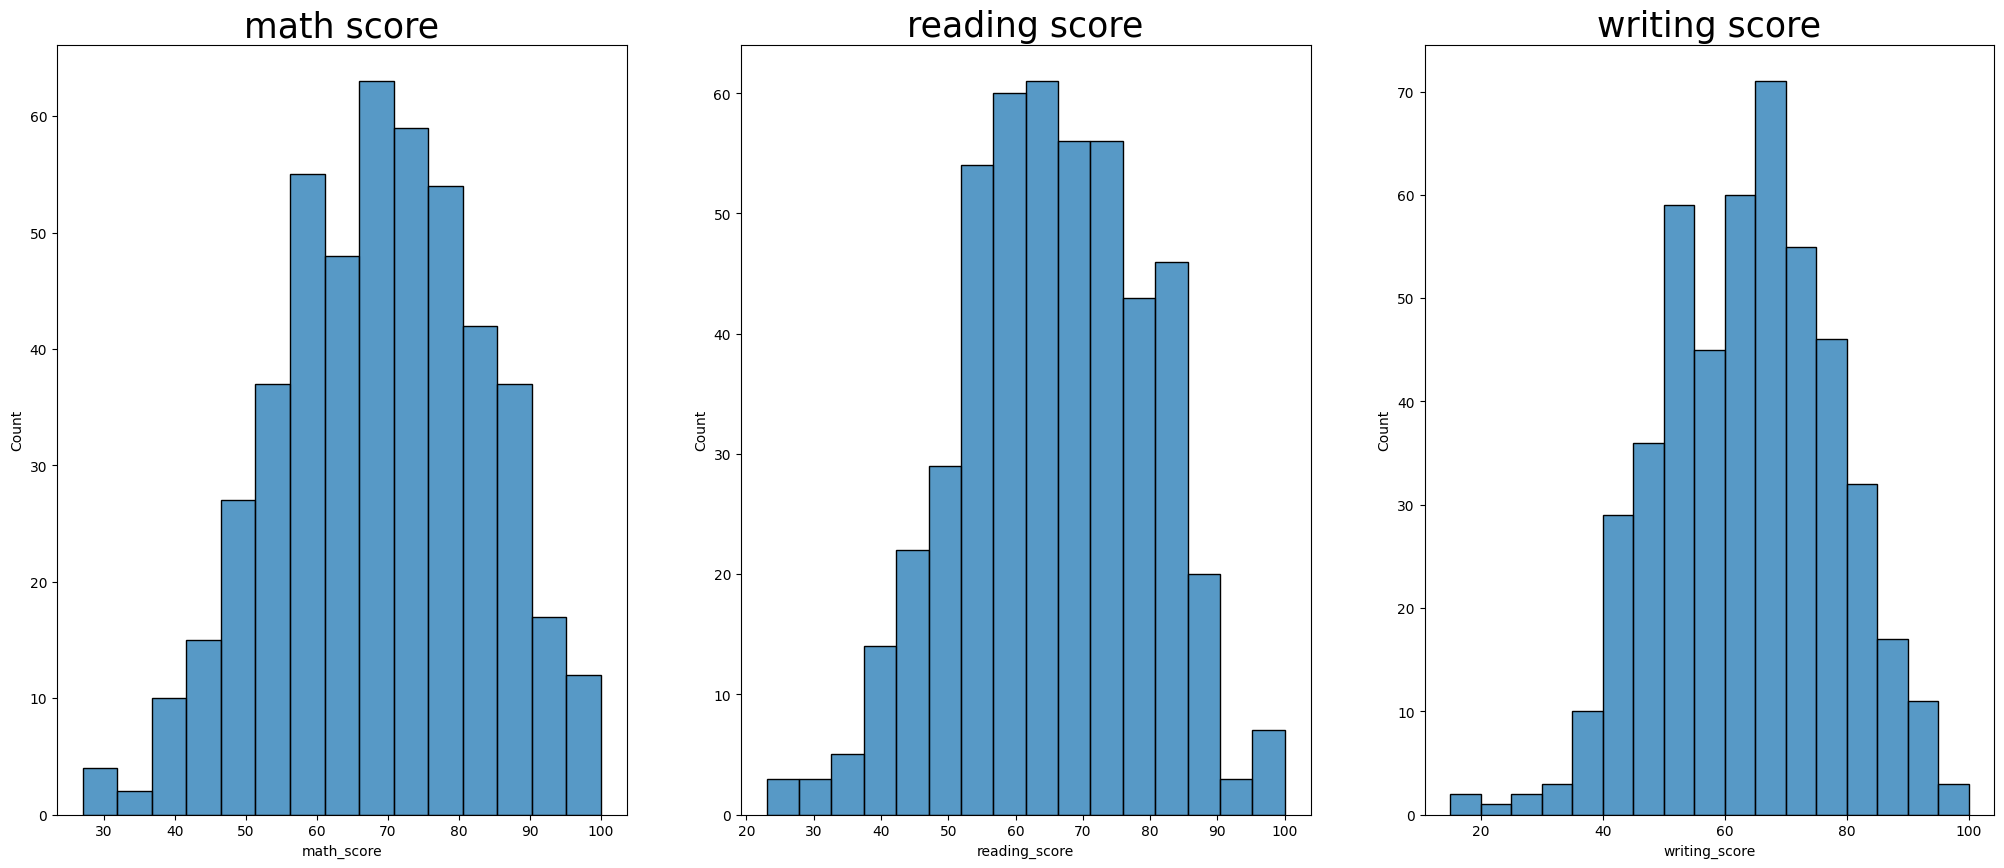

In [111]:
print('BASED ON MALE')
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))

sns.histplot(male['math_score'],ax=ax[0])
ax[0].set_title('math score',fontsize=25)

sns.histplot(male['reading_score'],ax=ax[1])
ax[1].set_title('reading score',fontsize=25)

sns.histplot(male['writing_score'],ax=ax[2])
ax[2].set_title('writing score',fontsize=25)
plt.show()

## Female

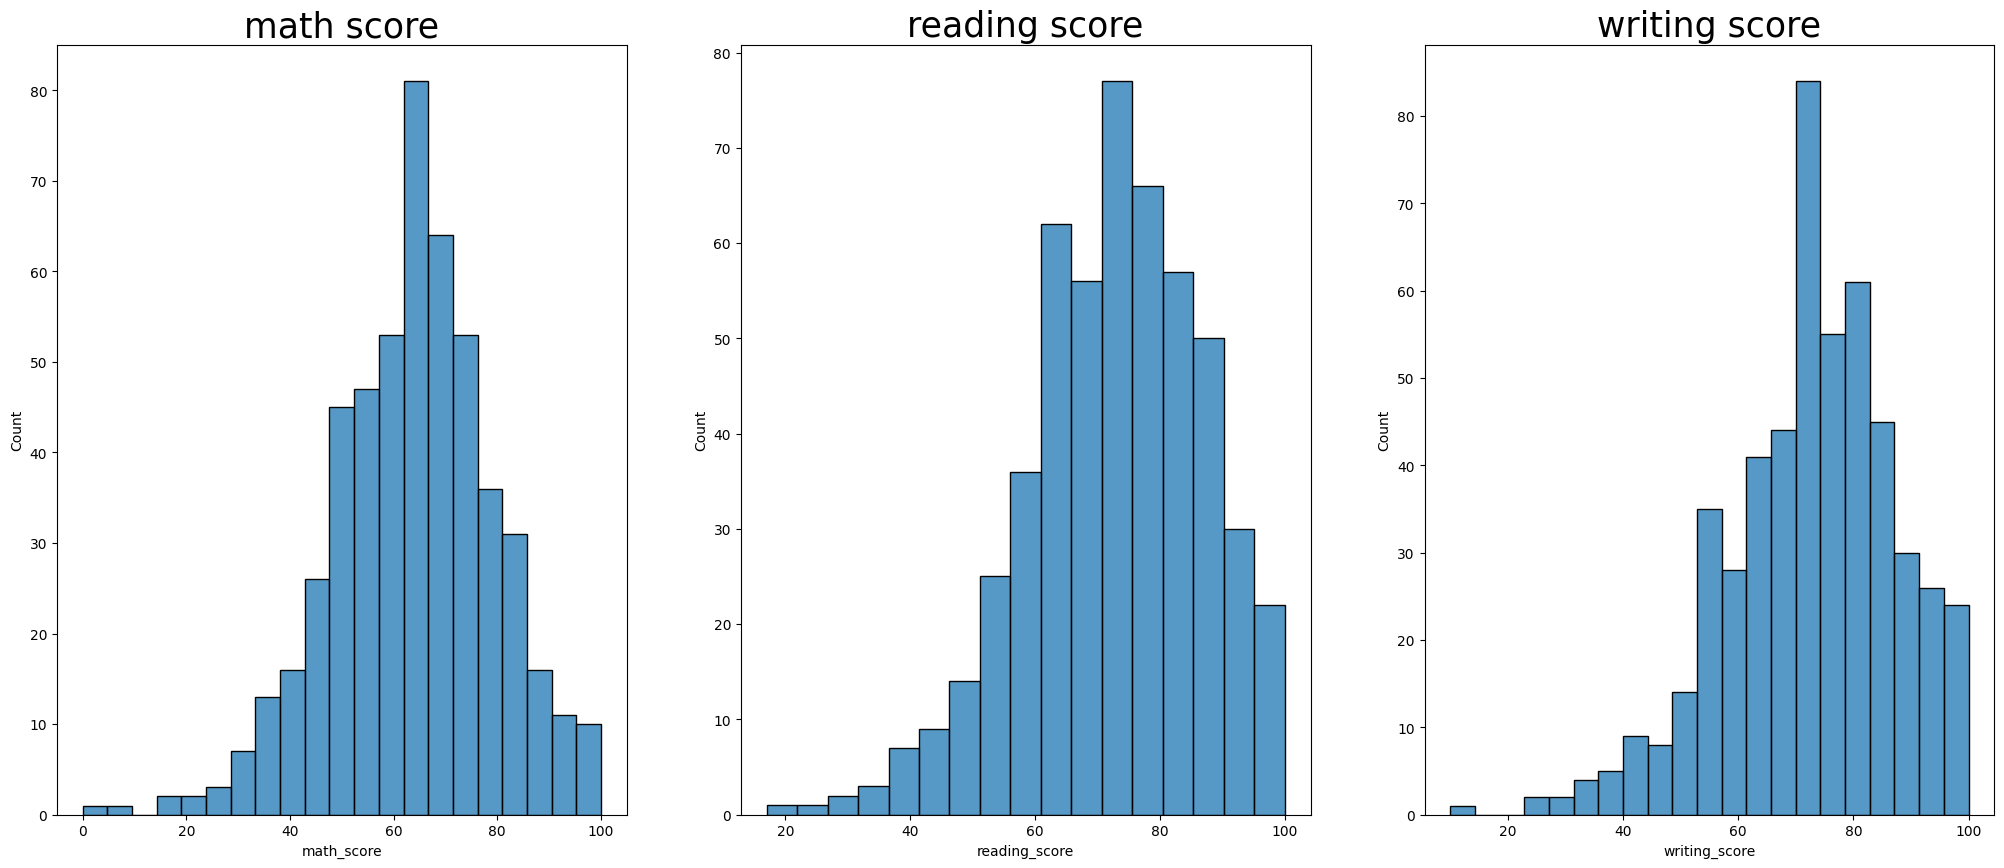

In [112]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
#MATH_SCORE
sns.histplot(famale['math_score'],ax=ax[0])
ax[0].set_title('math score',fontsize=25)
#READING_SCORE
sns.histplot(famale['reading_score'],ax=ax[1])
ax[1].set_title('reading score',fontsize=25)
#WRITING_SCORE
sns.histplot(famale['writing_score'],ax=ax[2])
ax[2].set_title('writing score',fontsize=25)
plt.show()

## LUNCH

In [113]:
by_male = male['lunch'].value_counts(ascending=False).reset_index()
by_male.rename(columns={
    'count' : 'male'},inplace=True)
by_female = famale['lunch'].value_counts(ascending=False).reset_index()
by_female.rename(columns={
    'count' : 'female'},inplace=True)

### MALE

          lunch  male
0      standard   316
1  free/reduced   166


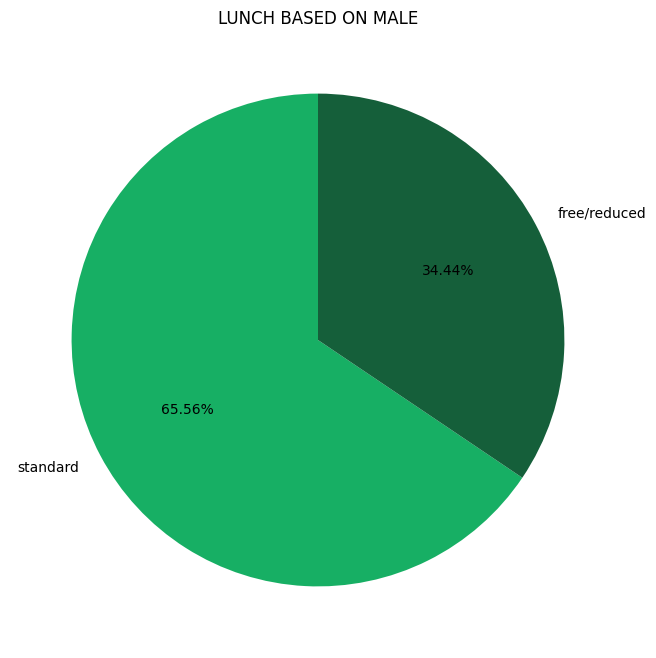

In [114]:
plt.figure(figsize=(10,8))
plt.pie(by_male['male'],labels=by_male['lunch'],
       startangle=90,autopct='%1.2f%%',
       colors=['#17AF64','#155F3A'])
plt.title('LUNCH BASED ON MALE')
print(by_male)
plt.show()

          lunch  female
0      standard     329
1  free/reduced     189


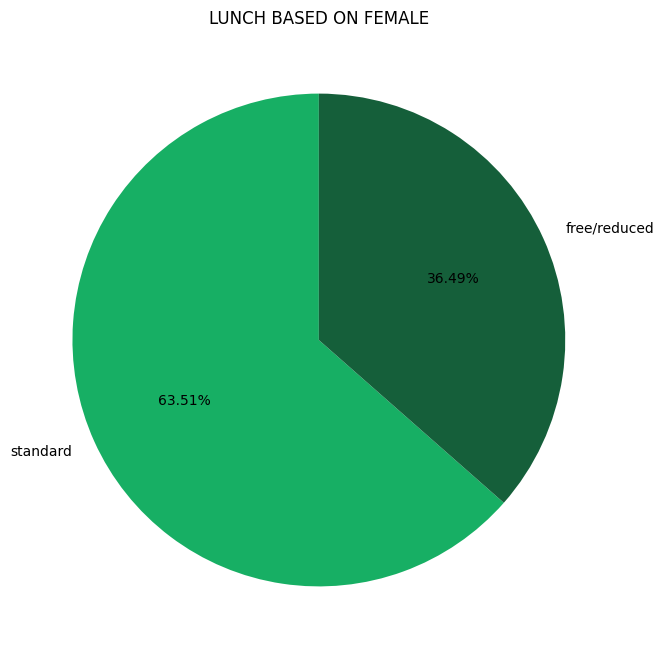

In [115]:
plt.figure(figsize=(10,8))
plt.pie(by_female['female'],labels=by_male['lunch'],
       startangle=90,autopct='%1.2f%%',
       colors=['#17AF64','#155F3A'])
plt.title('LUNCH BASED ON FEMALE')
print(by_female)
plt.show()

## GROUP

     group  male
0  group C   139
1  group D   133
2  group B    86
3  group E    71
4  group A    53
     group  female
0  group C     180
1  group D     129
2  group B     104
3  group E      69
4  group A      36


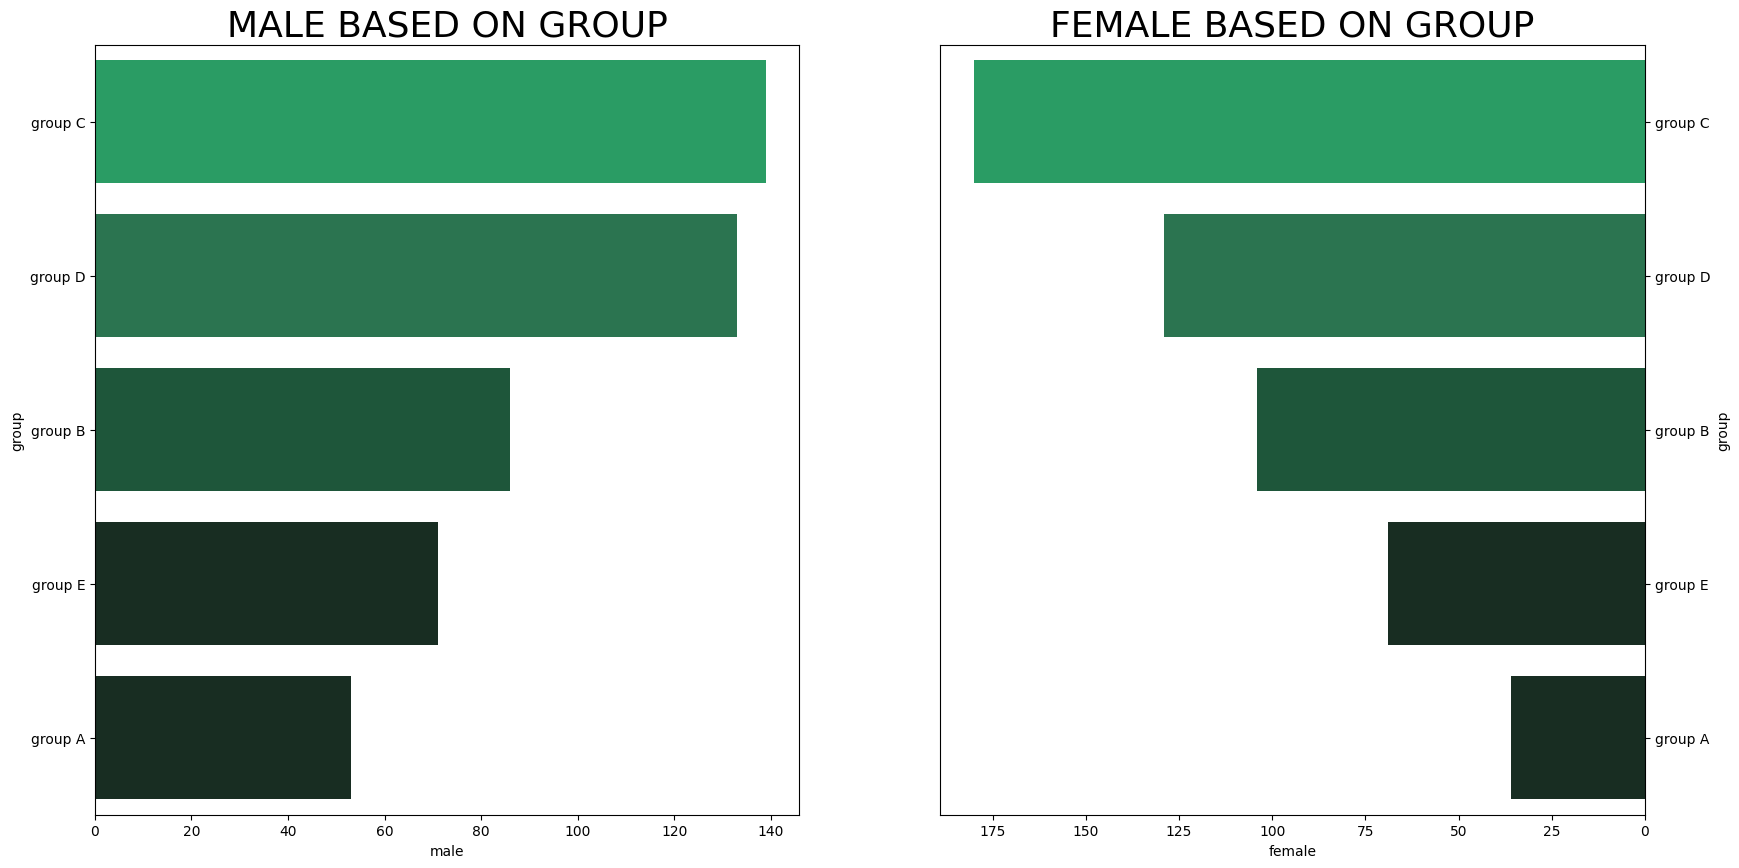

In [116]:
by_male = male['group'].value_counts(ascending=False).reset_index()
by_male.rename(columns={
    'count' : 'male'},inplace=True)
by_female = famale['group'].value_counts(ascending=False).reset_index()
by_female.rename(columns={
    'count' : 'female'},inplace=True)
print(by_male)
print(by_female)

color = ['#17AF64','#1F8050','#155F3A','#143022','#143022','#143022','#143022','#143022']
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10))
sns.barplot(x='male',y='group',data=by_male,palette=color,ax=ax[0])
ax[0].set_title('MALE BASED ON GROUP',fontsize=26)
sns.barplot(x='female',y='group',data=by_female,palette=color,ax=ax[1])
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].invert_xaxis()
ax[1].set_title('FEMALE BASED ON GROUP',fontsize=26)
plt.show()

## PARENTAL OF LEVEL EDUCATION

      level_education  male
0        some college   108
1  associate's degree   106
2         high school   102
3    some high school    88
4   bachelor's degree    55
5     master's degree    23


      level_education  female
0        some college     118
1  associate's degree     116
2         high school      94
3    some high school      91
4   bachelor's degree      63
5     master's degree      36


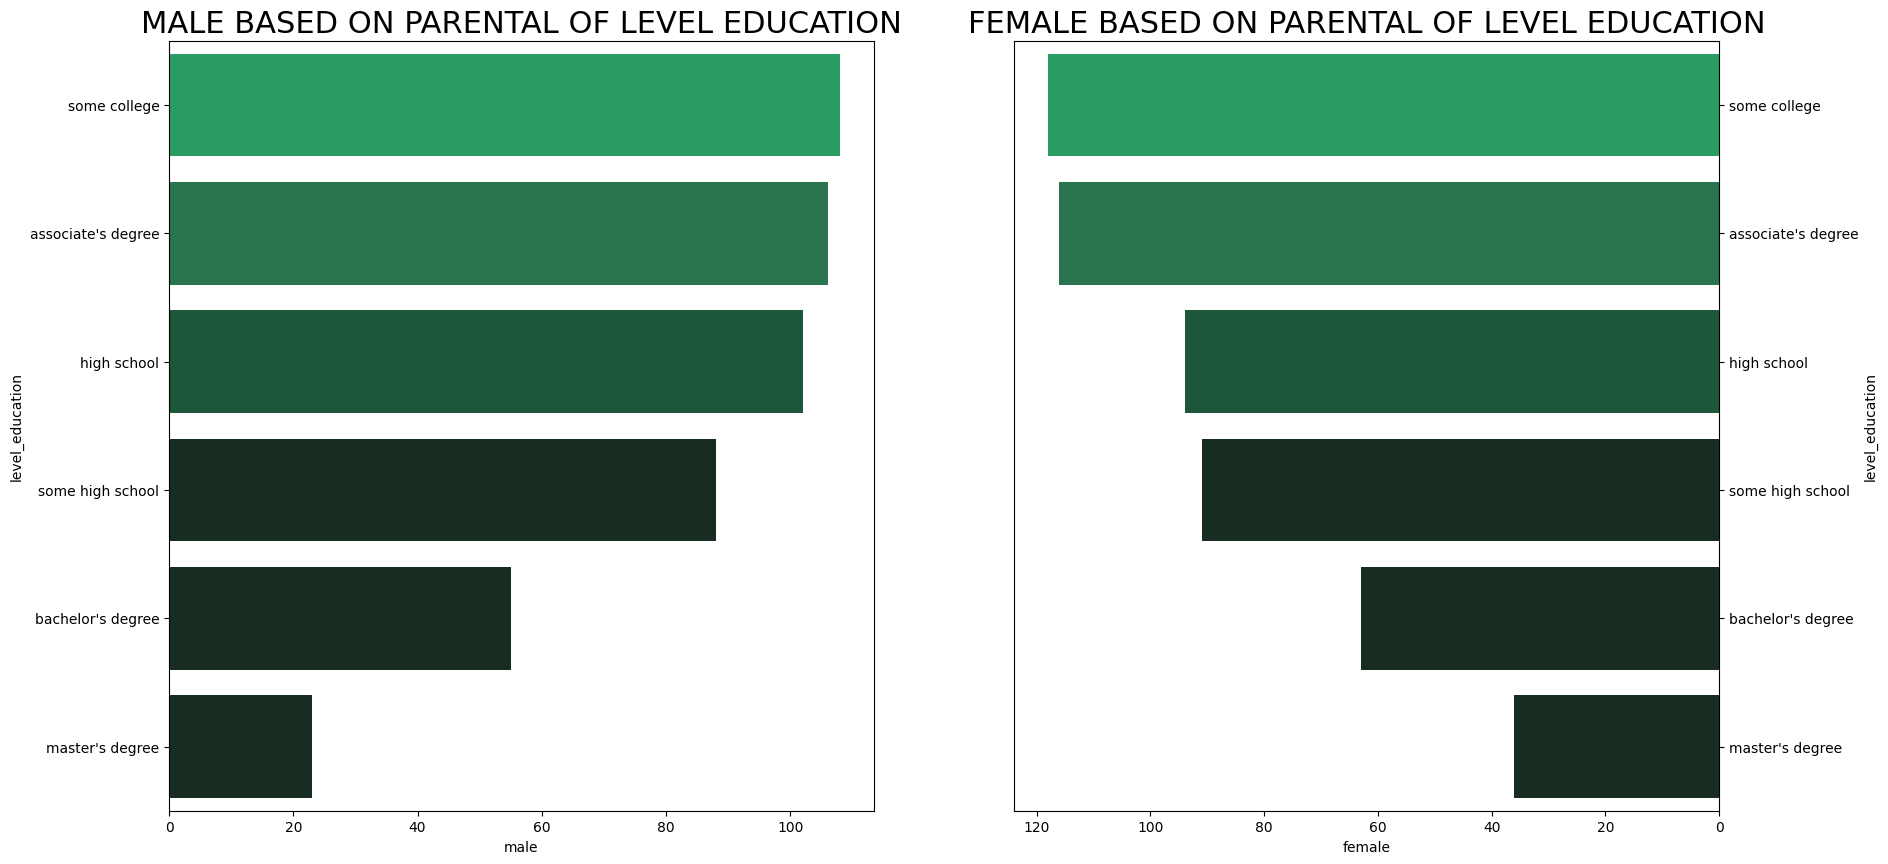

In [117]:
by_male = male['level_education'].value_counts(ascending=False).reset_index()
by_male.rename(columns={
    'count' : 'male'},inplace=True)
by_female = famale['level_education'].value_counts(ascending=False).reset_index()
by_female.rename(columns={
    'count' : 'female'},inplace=True)
print(by_male)
print('\n')
print(by_female)

color = ['#17AF64','#1F8050','#155F3A','#143022','#143022','#143022','#143022','#143022']
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10))
sns.barplot(x='male',y='level_education',data=by_male,palette=color,ax=ax[0])
ax[0].set_title('MALE BASED ON PARENTAL OF LEVEL EDUCATION',fontsize=22)
sns.barplot(x='female',y='level_education',data=by_female,palette=color,ax=ax[1])
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].invert_xaxis()
ax[1].set_title('FEMALE BASED ON PARENTAL OF LEVEL EDUCATION',fontsize=22)
plt.show()

## PREPARATION TEST COURSE

In [118]:
by_male = male['test_preparation_course'].value_counts(ascending=False).reset_index()
by_male.rename(columns={
    'count' : 'male'},inplace=True)

  test_preparation_course  male
0                    none   308
1               completed   174


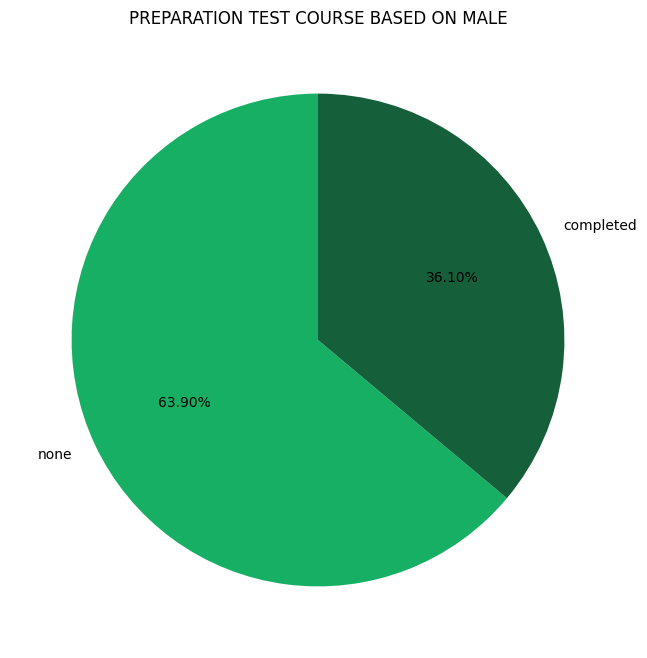

In [119]:
plt.figure(figsize=(10,8))
plt.pie(by_male['male'],labels=by_male['test_preparation_course'],
        startangle=90,autopct='%1.2f%%',
        colors=['#17AF64','#155F3A'])
plt.title('PREPARATION TEST COURSE BASED ON MALE')
print(by_male)
plt.show()

In [120]:
by_female = famale['test_preparation_course'].value_counts(ascending=False).reset_index()
by_female.rename(columns={
    'count' : 'female'},inplace=True)

  test_preparation_course  female
0                    none     334
1               completed     184


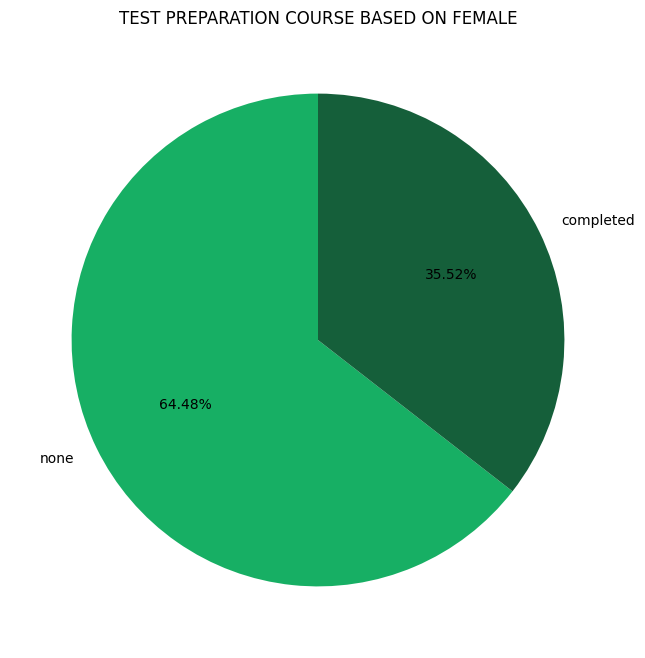

In [121]:
plt.figure(figsize=(10,8))
plt.pie(by_female['female'],labels=by_female['test_preparation_course'],
        startangle=90,autopct='%1.2f%%',
        colors=['#17AF64','#155F3A'])
plt.title('TEST PREPARATION COURSE BASED ON FEMALE')
print(by_female)
plt.show()

# 2. Based On Group

In [122]:
A = df.loc[(df['group']=='group A')]
B = df.loc[(df['group']=='group B')]
C = df.loc[(df['group']=='group C')]
D = df.loc[(df['group']=='group D')]
E = df.loc[(df['group']=='group E')]

## GROUP A

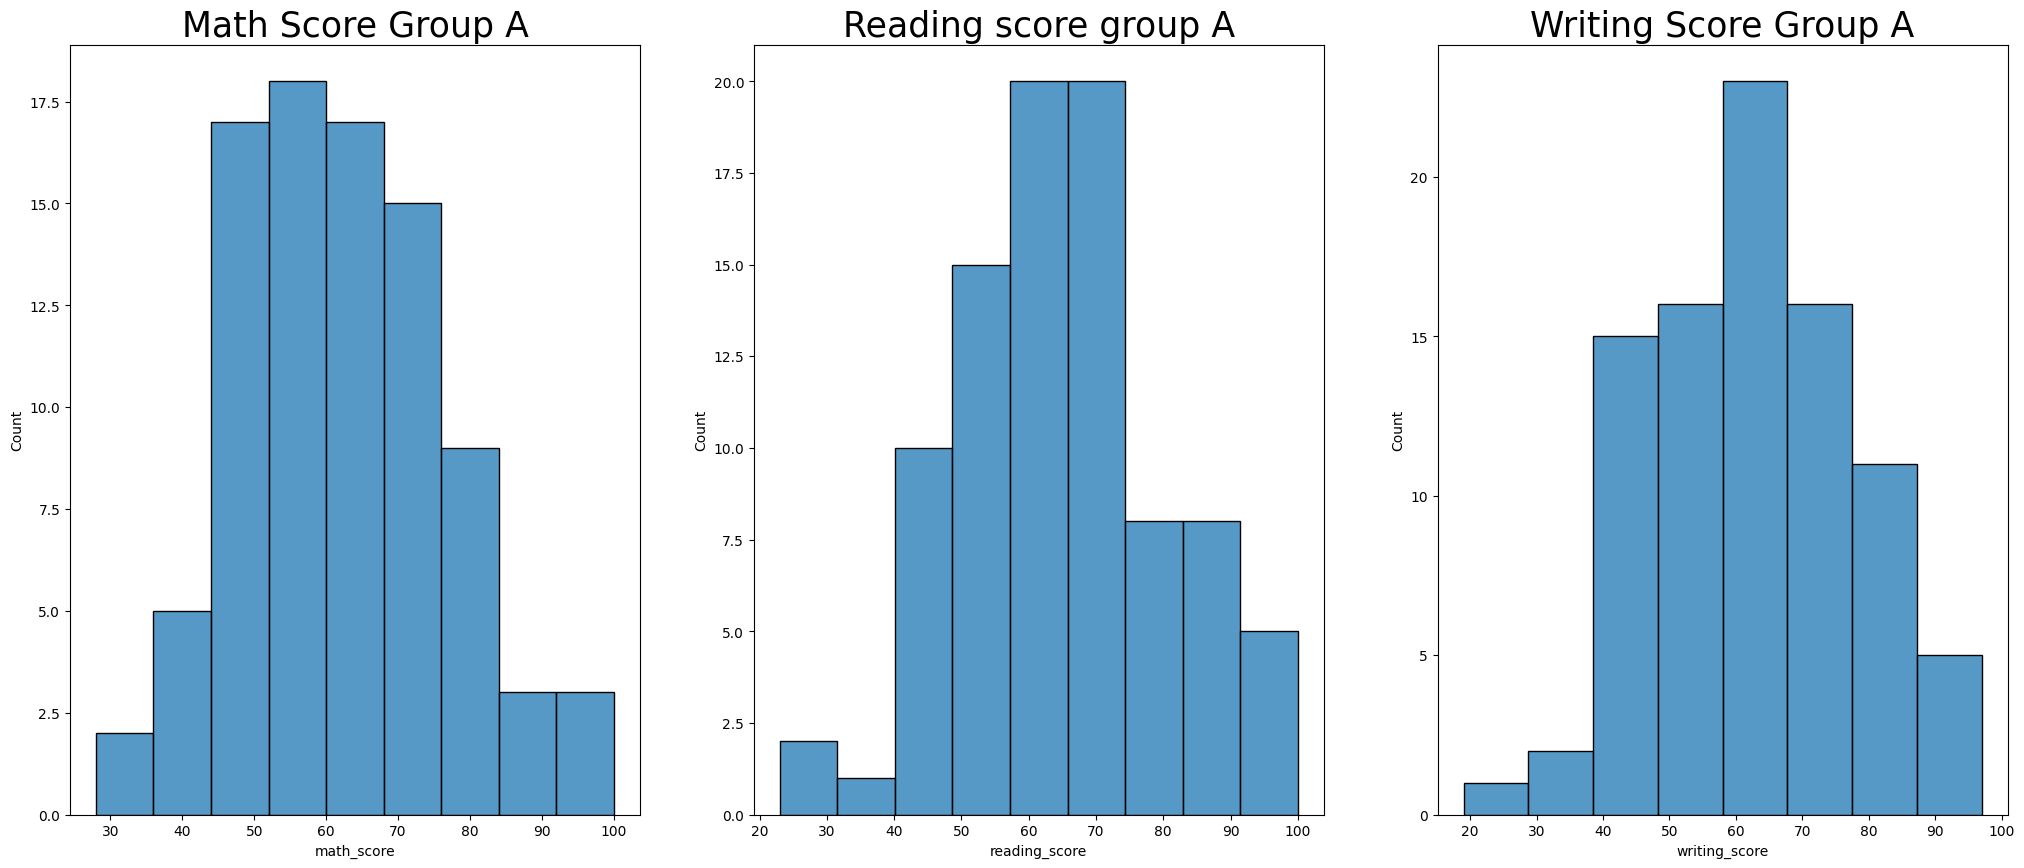

In [123]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(A['math_score'],ax=ax[0])
ax[0].set_title('Math Score Group A',fontsize=25)
sns.histplot(A['reading_score'],ax=ax[1])
ax[1].set_title('Reading score group A',fontsize=25)
sns.histplot(A['writing_score'],ax=ax[2])
ax[2].set_title('Writing Score Group A',fontsize=25)
plt.show()

## GROUP B

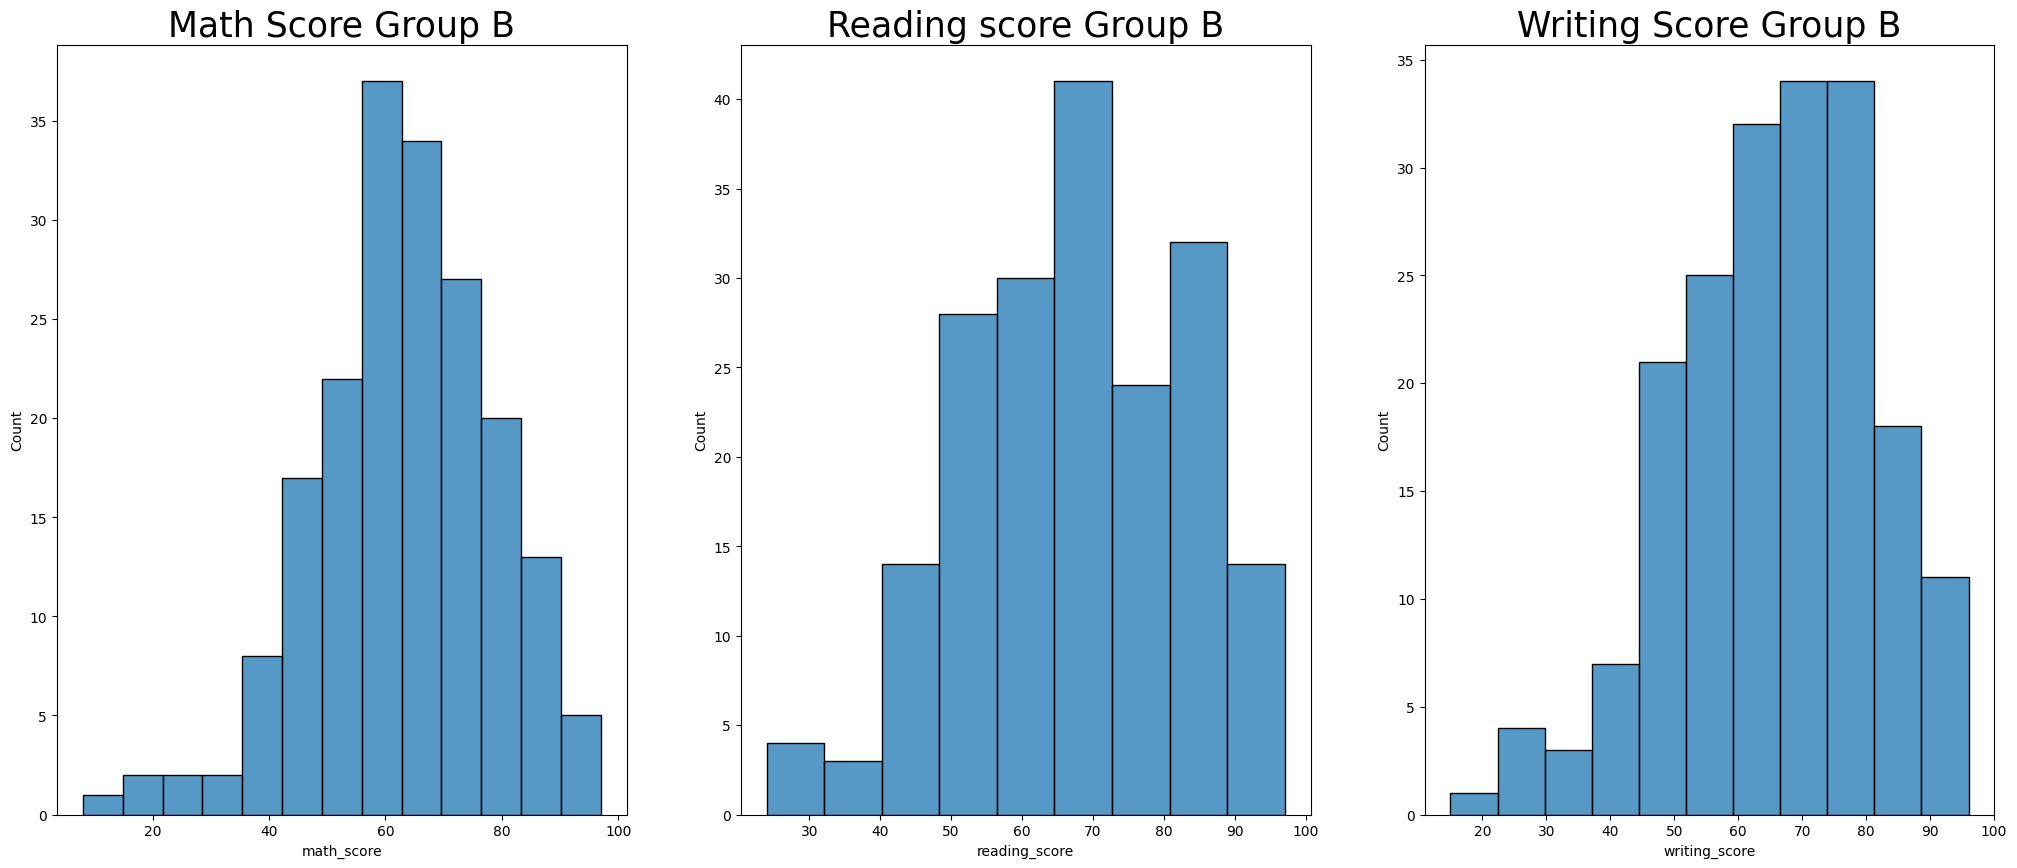

In [124]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(B['math_score'],ax=ax[0])
ax[0].set_title('Math Score Group B',fontsize=25)
sns.histplot(B['reading_score'],ax=ax[1])
ax[1].set_title('Reading score Group B',fontsize=25)
sns.histplot(B['writing_score'],ax=ax[2])
ax[2].set_title('Writing Score Group B',fontsize=25)
plt.show()

## GROUP C

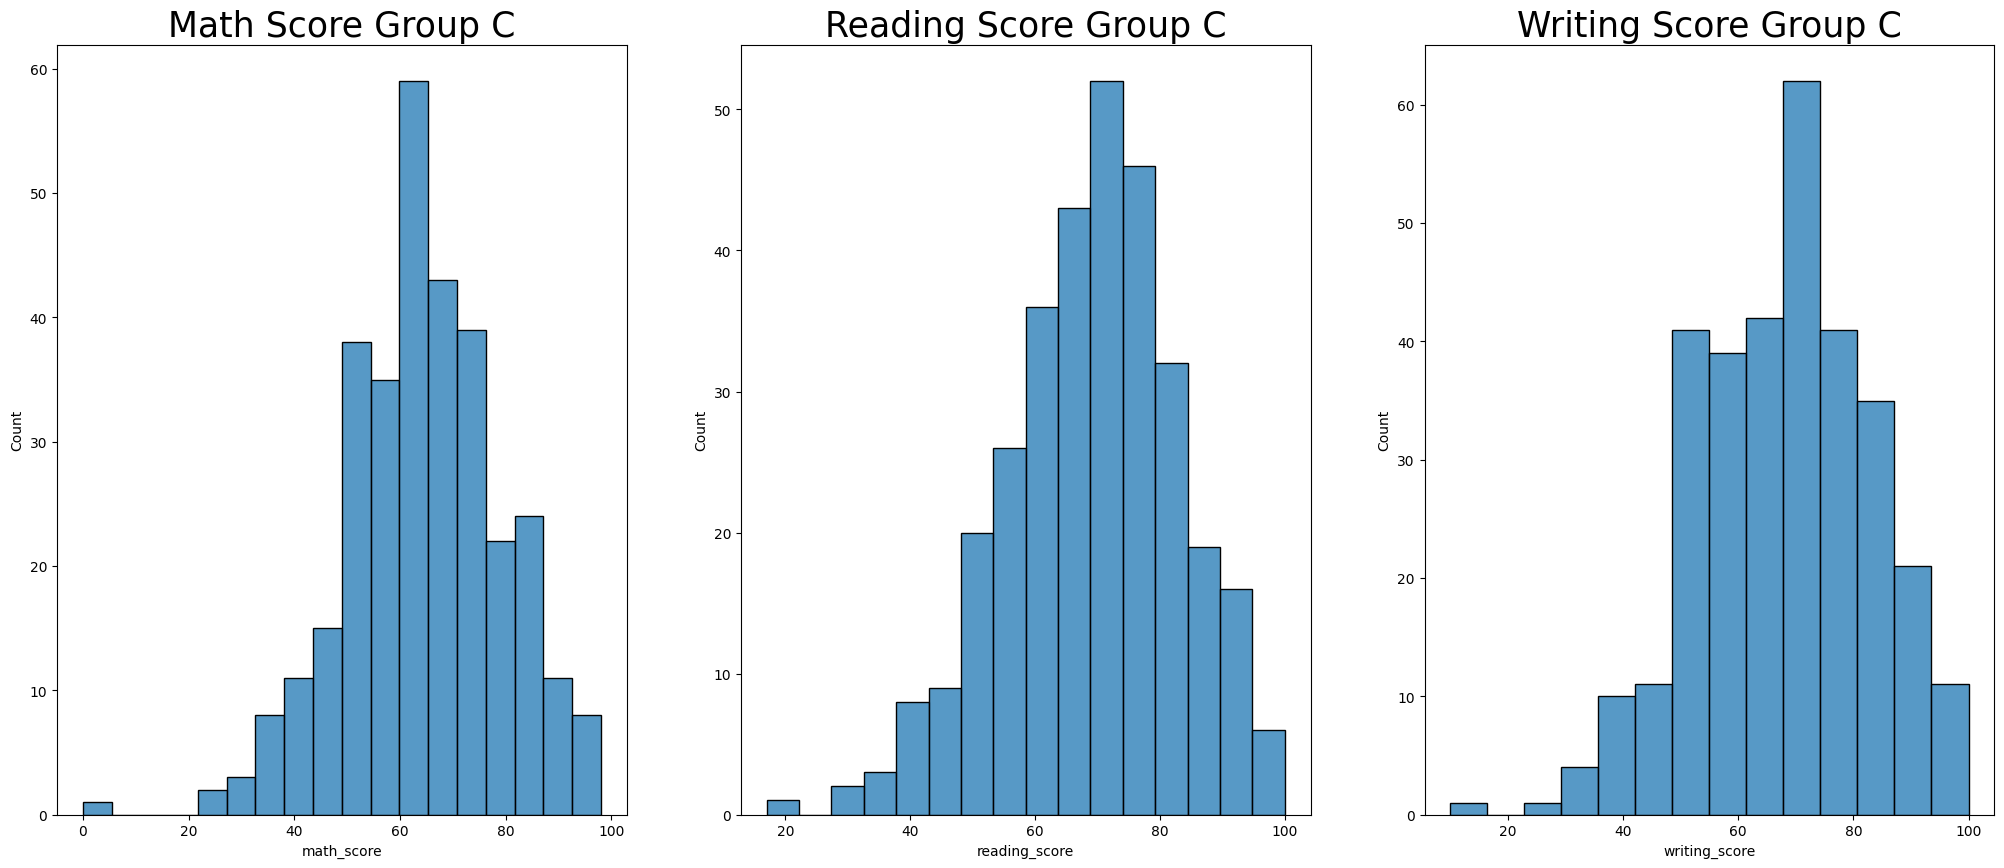

In [125]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(C['math_score'],ax=ax[0])
ax[0].set_title('Math Score Group C',fontsize=25)
sns.histplot(C['reading_score'],ax=ax[1])
ax[1].set_title('Reading Score Group C',fontsize=25)
sns.histplot(C['writing_score'],ax=ax[2])
ax[2].set_title('Writing Score Group C',fontsize=25)
plt.show()

## GROUP D

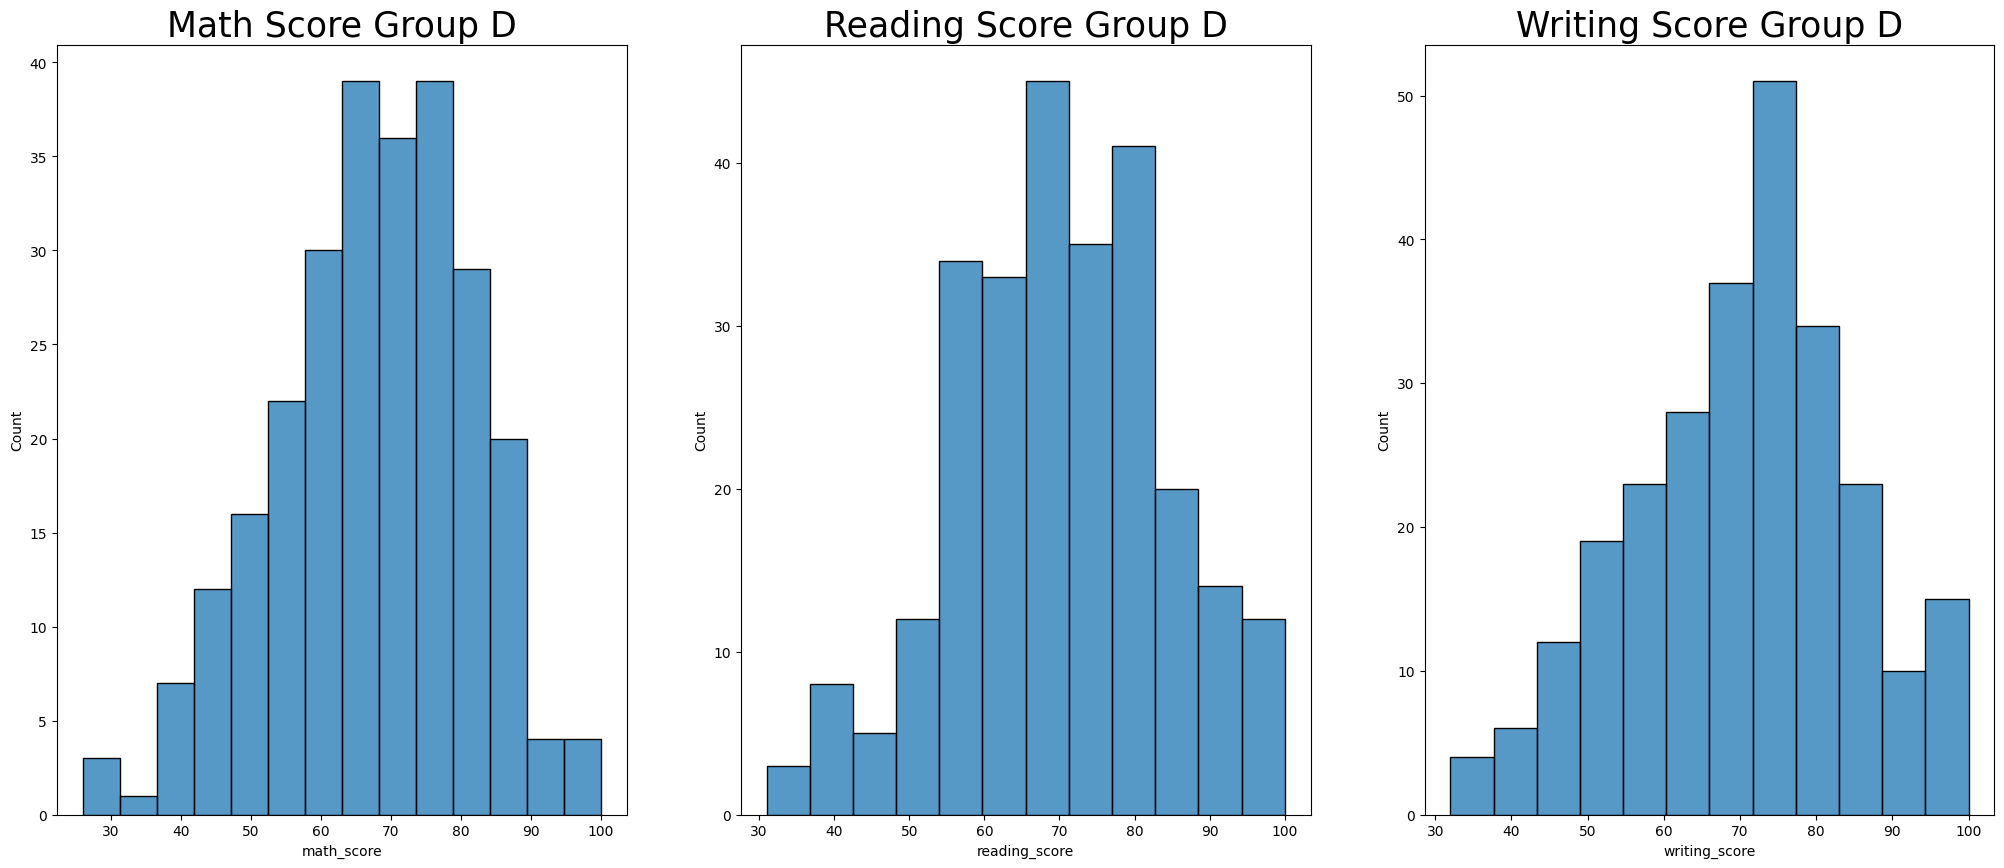

In [126]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(D['math_score'],ax=ax[0])
ax[0].set_title('Math Score Group D',fontsize=25)
sns.histplot(D['reading_score'],ax=ax[1])
ax[1].set_title('Reading Score Group D',fontsize=25)
sns.histplot(D['writing_score'],ax=ax[2])
ax[2].set_title('Writing Score Group D',fontsize=25)
plt.show()

## GROUP E

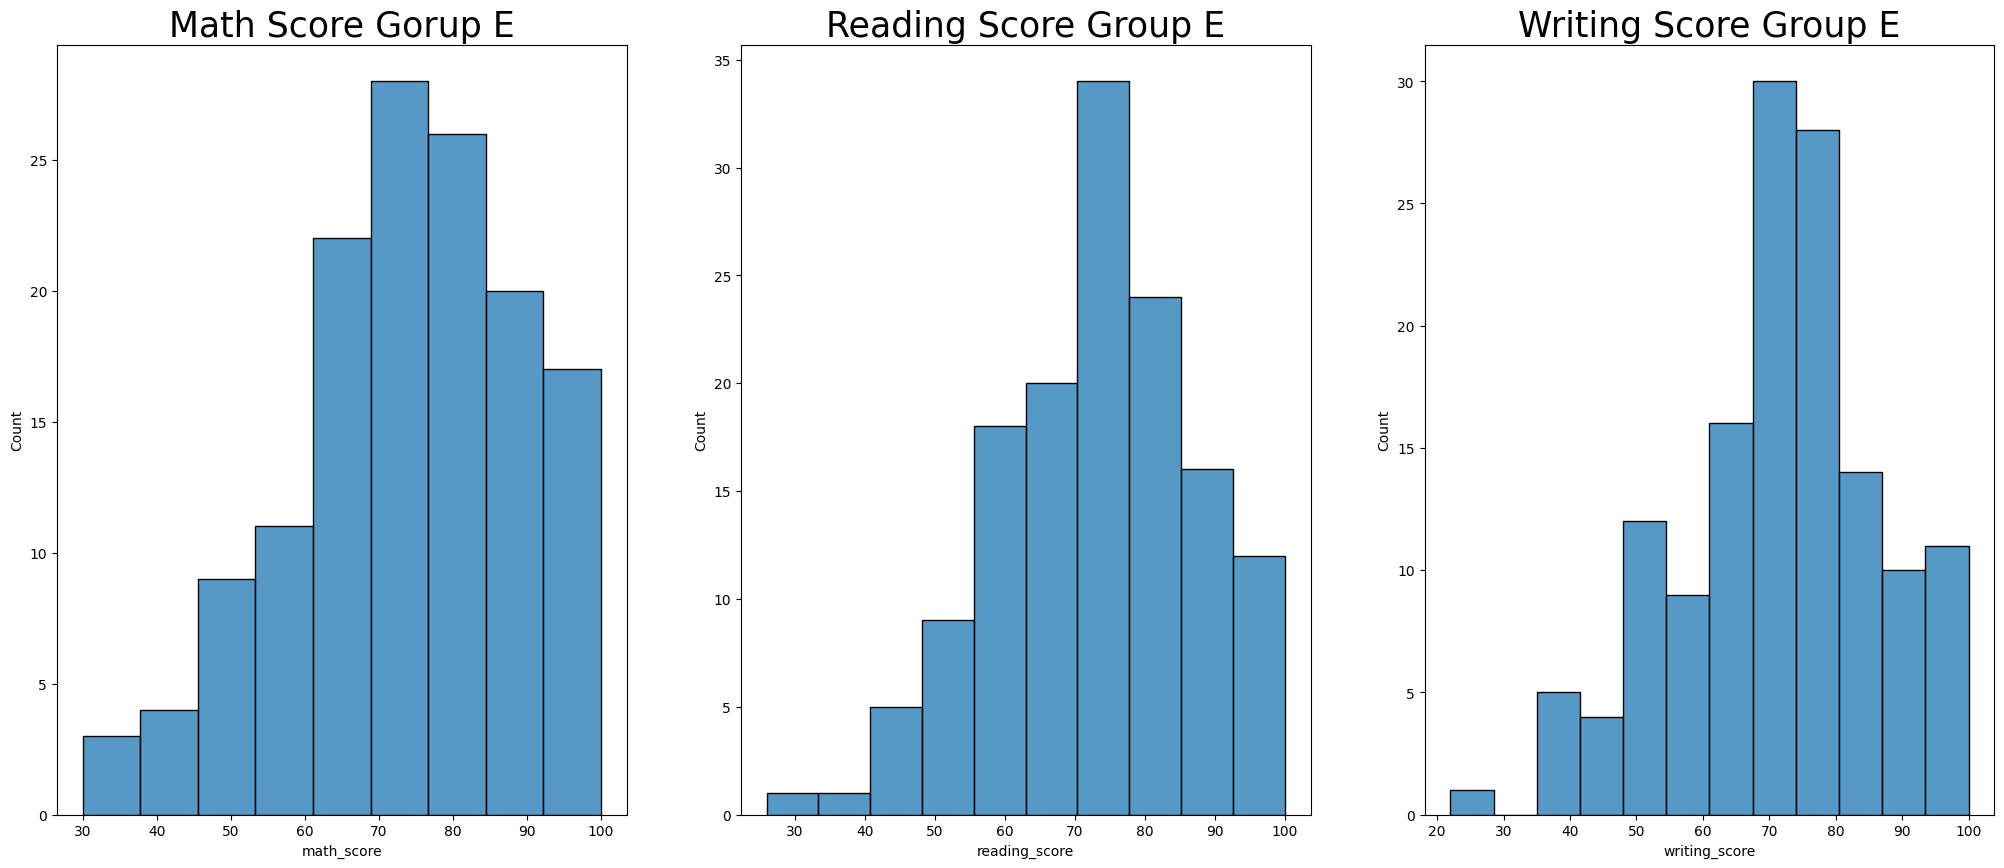

In [127]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(E['math_score'],ax=ax[0])
ax[0].set_title('Math Score Gorup E',fontsize=25)
sns.histplot(E['reading_score'],ax=ax[1])
ax[1].set_title('Reading Score Group E',fontsize=25)
sns.histplot(E['writing_score'],ax=ax[2])
ax[2].set_title('Writing Score Group E',fontsize=25)
plt.show()

## PARENTAL OF LEVEL EDUCATION

In [128]:
level_a = A['level_education'].value_counts().reset_index()
level_b = B['level_education'].value_counts().reset_index()
level_c = C['level_education'].value_counts().reset_index()
level_d = D['level_education'].value_counts().reset_index()
level_e = E['level_education'].value_counts().reset_index()

In [129]:
print('BASED ON GROUP A')
print(level_a)
print('\n')
print('BASED ON GROUP B')
print(level_b)
print('\n')
print('BASED ON GROUP C')
print(level_c)
print('\n')
print('BASED ON GROUP D')
print(level_d)
print('\n')
print('BASED ON GROUP E')
print(level_e)

BASED ON GROUP A
      level_education  count
0    some high school     24
1        some college     18
2         high school     18
3  associate's degree     14
4   bachelor's degree     12
5     master's degree      3


BASED ON GROUP B
      level_education  count
0         high school     48
1  associate's degree     41
2    some high school     38
3        some college     37
4   bachelor's degree     20
5     master's degree      6


BASED ON GROUP C
      level_education  count
0  associate's degree     78
1        some college     69
2         high school     64
3    some high school     49
4   bachelor's degree     40
5     master's degree     19


BASED ON GROUP D
      level_education  count
0        some college     67
1  associate's degree     50
2    some high school     50
3         high school     44
4   bachelor's degree     28
5     master's degree     23


BASED ON GROUP E
      level_education  count
0  associate's degree     39
1        some college     35
2       

## BASED ON AVERGAGE

In [130]:
average_group = df.groupby(by='group').average.sum().sort_values(ascending=False).reset_index()
average_group

,group,average
0,group C,21415.000000
1,group D,18125.000000
2,group B,12439.000000
3,group E,10185.333333
4,group A,5606.333333


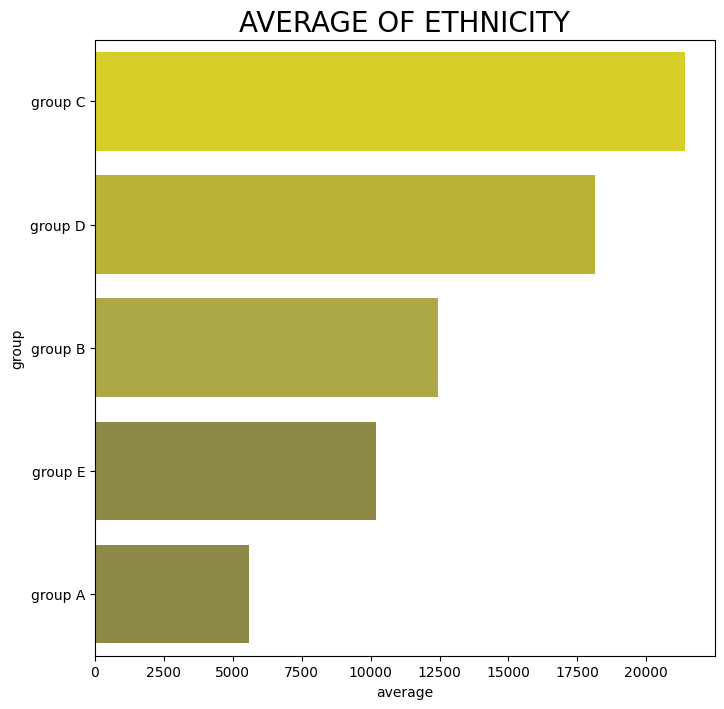

In [131]:
color_n = ['#F4E90A','#CFC721','#BDB636','#99943B','#99943B']
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(8,8))
sns.barplot(x='average',y='group',data=average_group.sort_values(by='average',ascending=False),palette=color_n)
ax.set_title('AVERAGE OF ETHNICITY',fontsize=20)
plt.show()

## LUNCH

In [132]:
level_a = A['lunch'].value_counts().reset_index()
level_b = B['lunch'].value_counts().reset_index()
level_c = C['lunch'].value_counts().reset_index()
level_d = D['lunch'].value_counts().reset_index()
level_e = E['lunch'].value_counts().reset_index()

In [133]:
print('BASED ON GROUP A')
print(level_a)
print('\n')
print('BASED ON GROUP B')
print(level_b)
print('\n')
print('BASED ON GROUP C')
print(level_c)
print('\n')
print('BASED ON GROUP D')
print(level_d)
print('\n')
print('BASED ON GROUP E')
print(level_e)

BASED ON GROUP A
          lunch  count
0      standard     53
1  free/reduced     36


BASED ON GROUP B
          lunch  count
0      standard    121
1  free/reduced     69


BASED ON GROUP C
          lunch  count
0      standard    205
1  free/reduced    114


BASED ON GROUP D
          lunch  count
0      standard    167
1  free/reduced     95


BASED ON GROUP E
          lunch  count
0      standard     99
1  free/reduced     41


## TEST PREPARATION COURSE

In [134]:
level_a = A['test_preparation_course'].value_counts().reset_index()
level_b = B['test_preparation_course'].value_counts().reset_index()
level_c = C['test_preparation_course'].value_counts().reset_index()
level_d = D['test_preparation_course'].value_counts().reset_index()
level_e = E['test_preparation_course'].value_counts().reset_index()

In [135]:
print('BASED ON GROUP A')
print(level_a)
print('\n')
print('BASED ON GROUP B')
print(level_b)
print('\n')
print('BASED ON GROUP C')
print(level_c)
print('\n')
print('BASED ON GROUP D')
print(level_d)
print('\n')
print('BASED ON GROUP E')
print(level_e)

BASED ON GROUP A
  test_preparation_course  count
0                    none     58
1               completed     31


BASED ON GROUP B
  test_preparation_course  count
0                    none    122
1               completed     68


BASED ON GROUP C
  test_preparation_course  count
0                    none    202
1               completed    117


BASED ON GROUP D
  test_preparation_course  count
0                    none    180
1               completed     82


BASED ON GROUP E
  test_preparation_course  count
0                    none     80
1               completed     60


# 3. Based On Parental of Level Education

In [136]:
some_collage = df.loc[(df['level_education']=='some college')]
degree = df.loc[(df['level_education'].str.contains('associate'))]
high_school = df.loc[(df['level_education']=='high school')]
some_school = df.loc[(df['level_education']=='some high school')]
bachelor = df.loc[(df['level_education'].str.contains('bachelor'))]
master = df.loc[(df['level_education'].str.contains('master'))]

## Some College

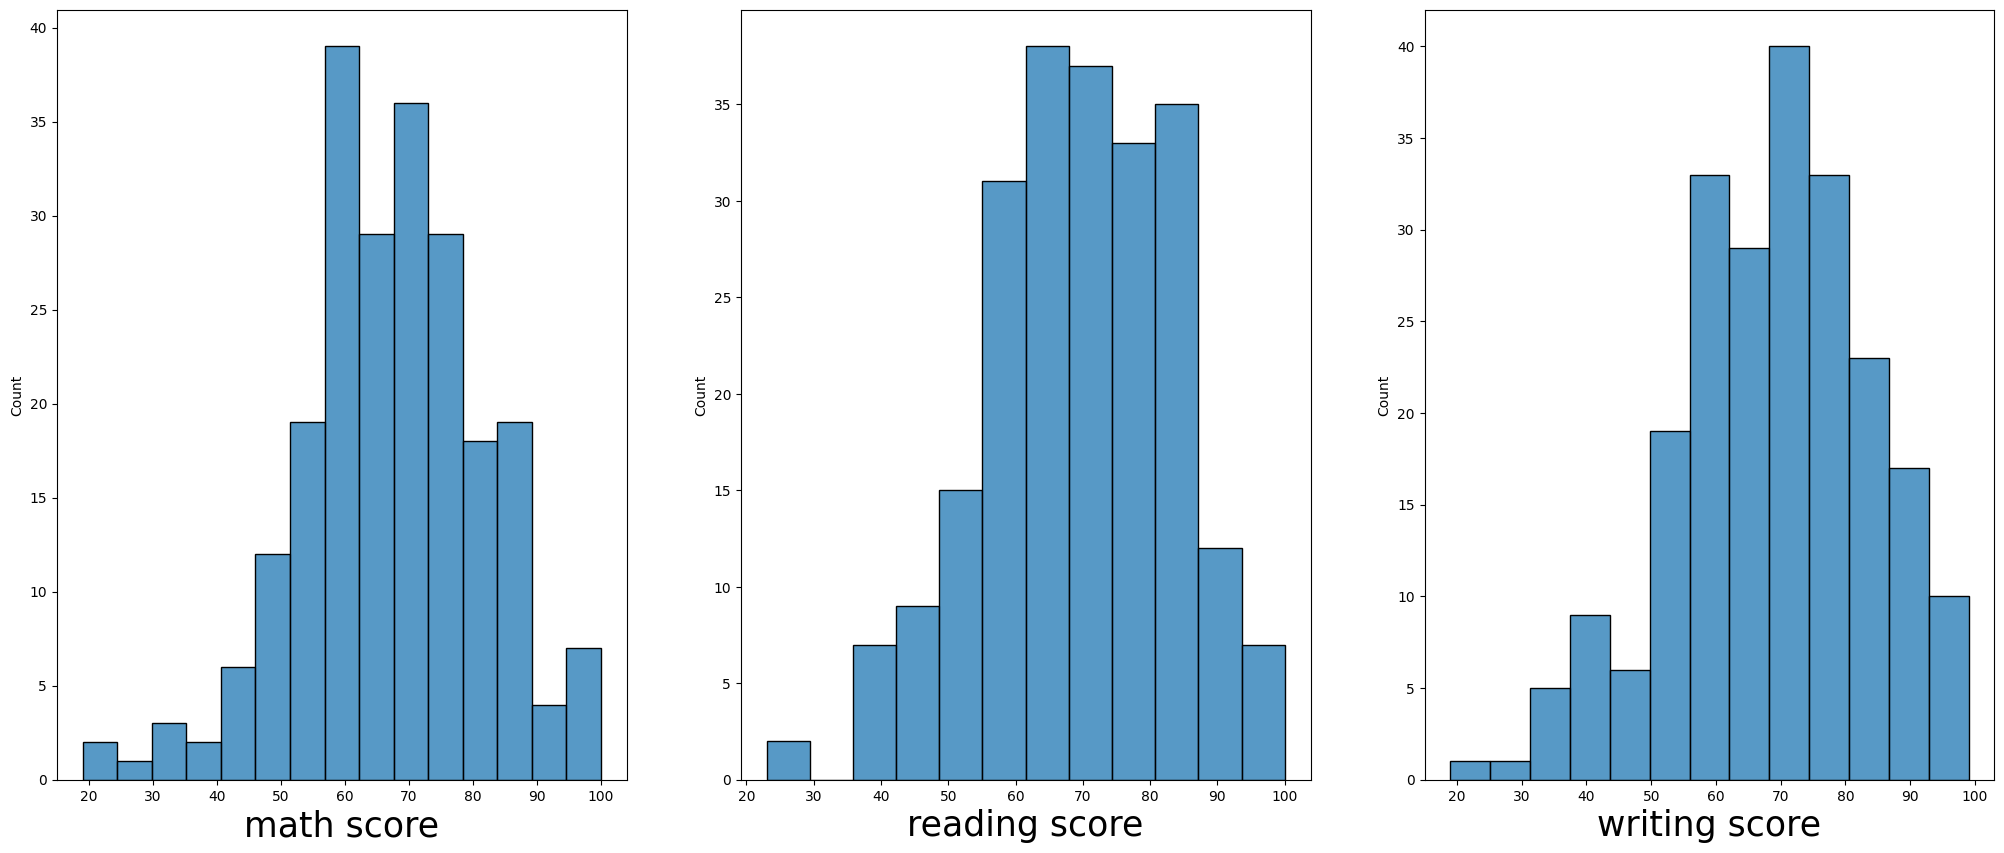

In [137]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(some_collage['math_score'],ax=ax[0])
ax[0].set_xlabel('math score',fontsize=25)
sns.histplot(some_collage['reading_score'],ax=ax[1])
ax[1].set_xlabel('reading score',fontsize=25)
sns.histplot(some_collage['writing_score'],ax=ax[2])
ax[2].set_xlabel('writing score',fontsize=25)
plt.show()

## associate's degree

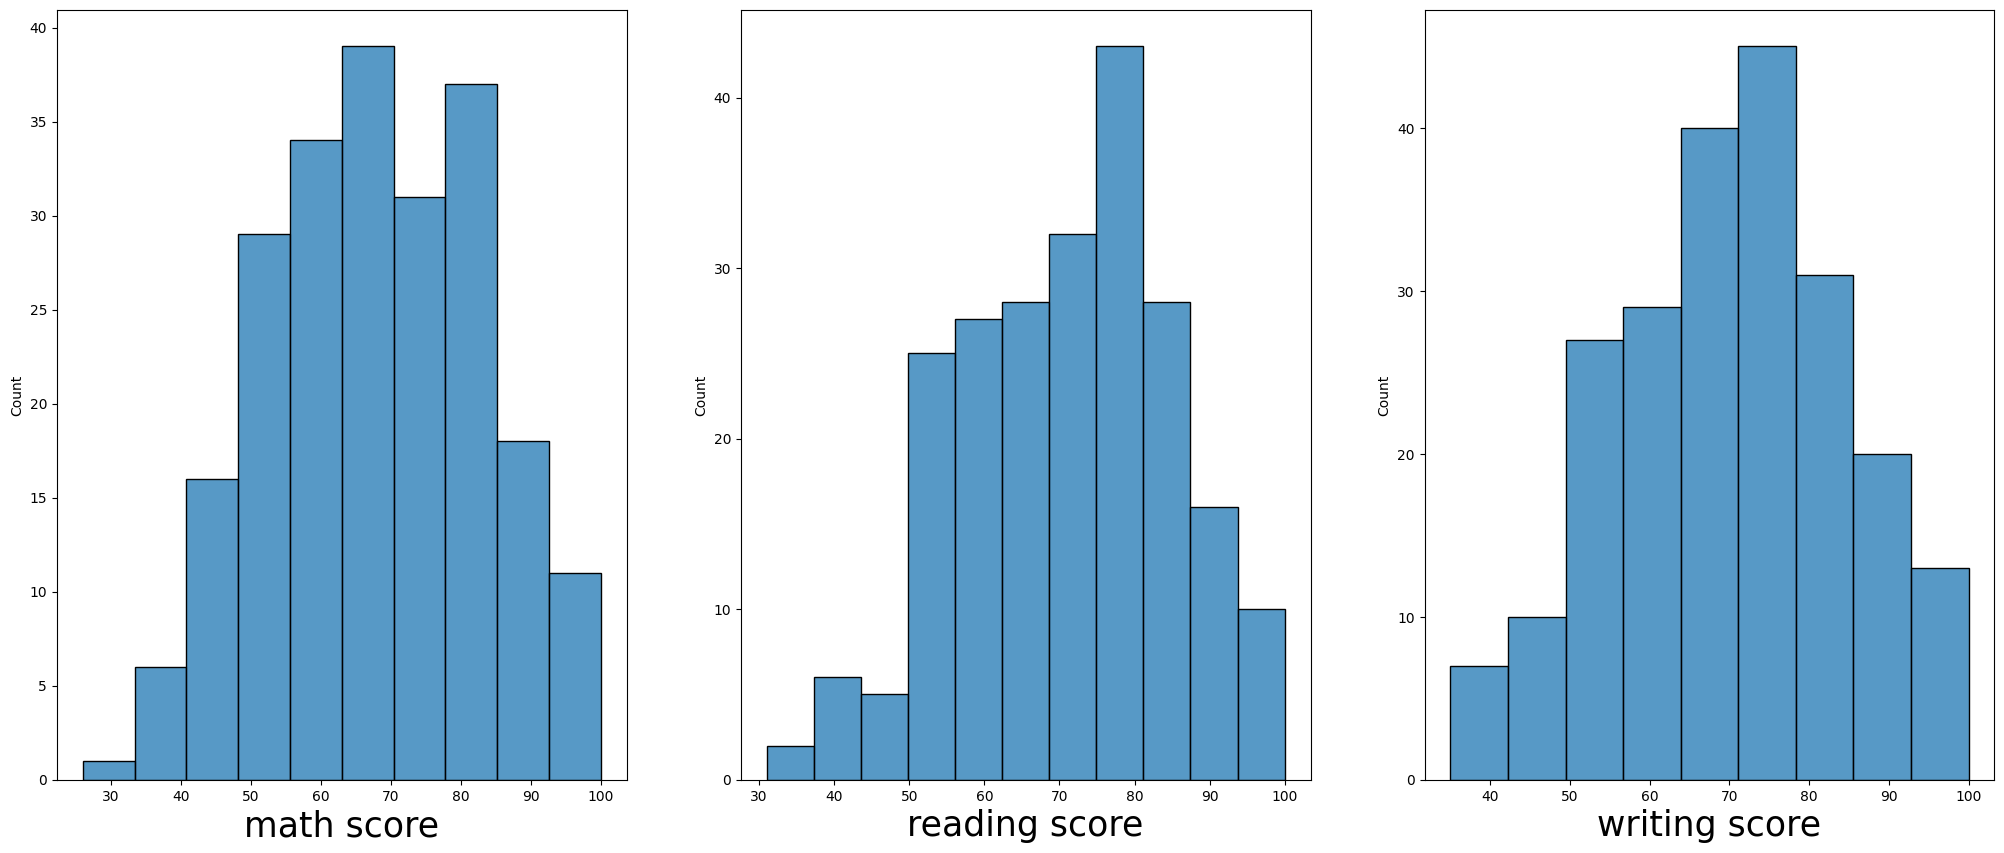

In [138]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(degree['math_score'],ax=ax[0])
ax[0].set_xlabel('math score',fontsize=25)
sns.histplot(degree['reading_score'],ax=ax[1])
ax[1].set_xlabel('reading score',fontsize=25)
sns.histplot(degree['writing_score'],ax=ax[2])
ax[2].set_xlabel('writing score',fontsize=25)
plt.show()

## High Schools

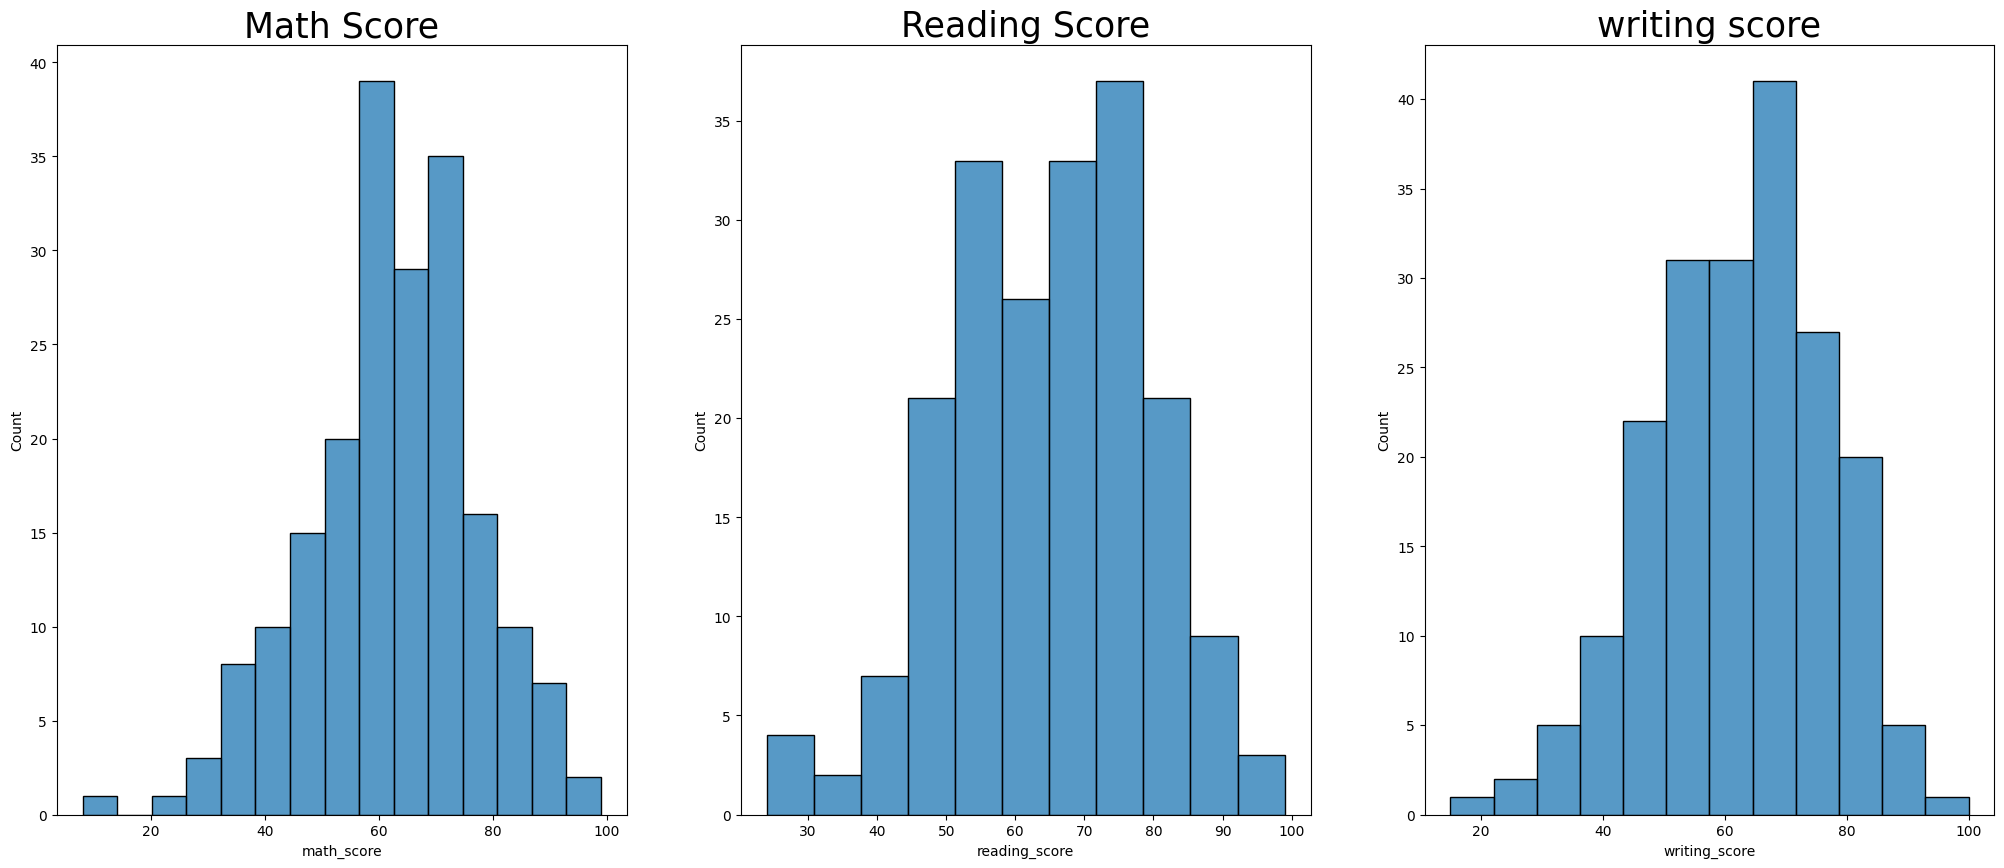

In [139]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(high_school['math_score'],ax=ax[0])
ax[0].set_title('Math Score',fontsize=25)
sns.histplot(high_school['reading_score'],ax=ax[1])
ax[1].set_title('Reading Score',fontsize=25)
sns.histplot(high_school['writing_score'],ax=ax[2])
ax[2].set_title('writing score',fontsize=25)
plt.show()

## Some High School

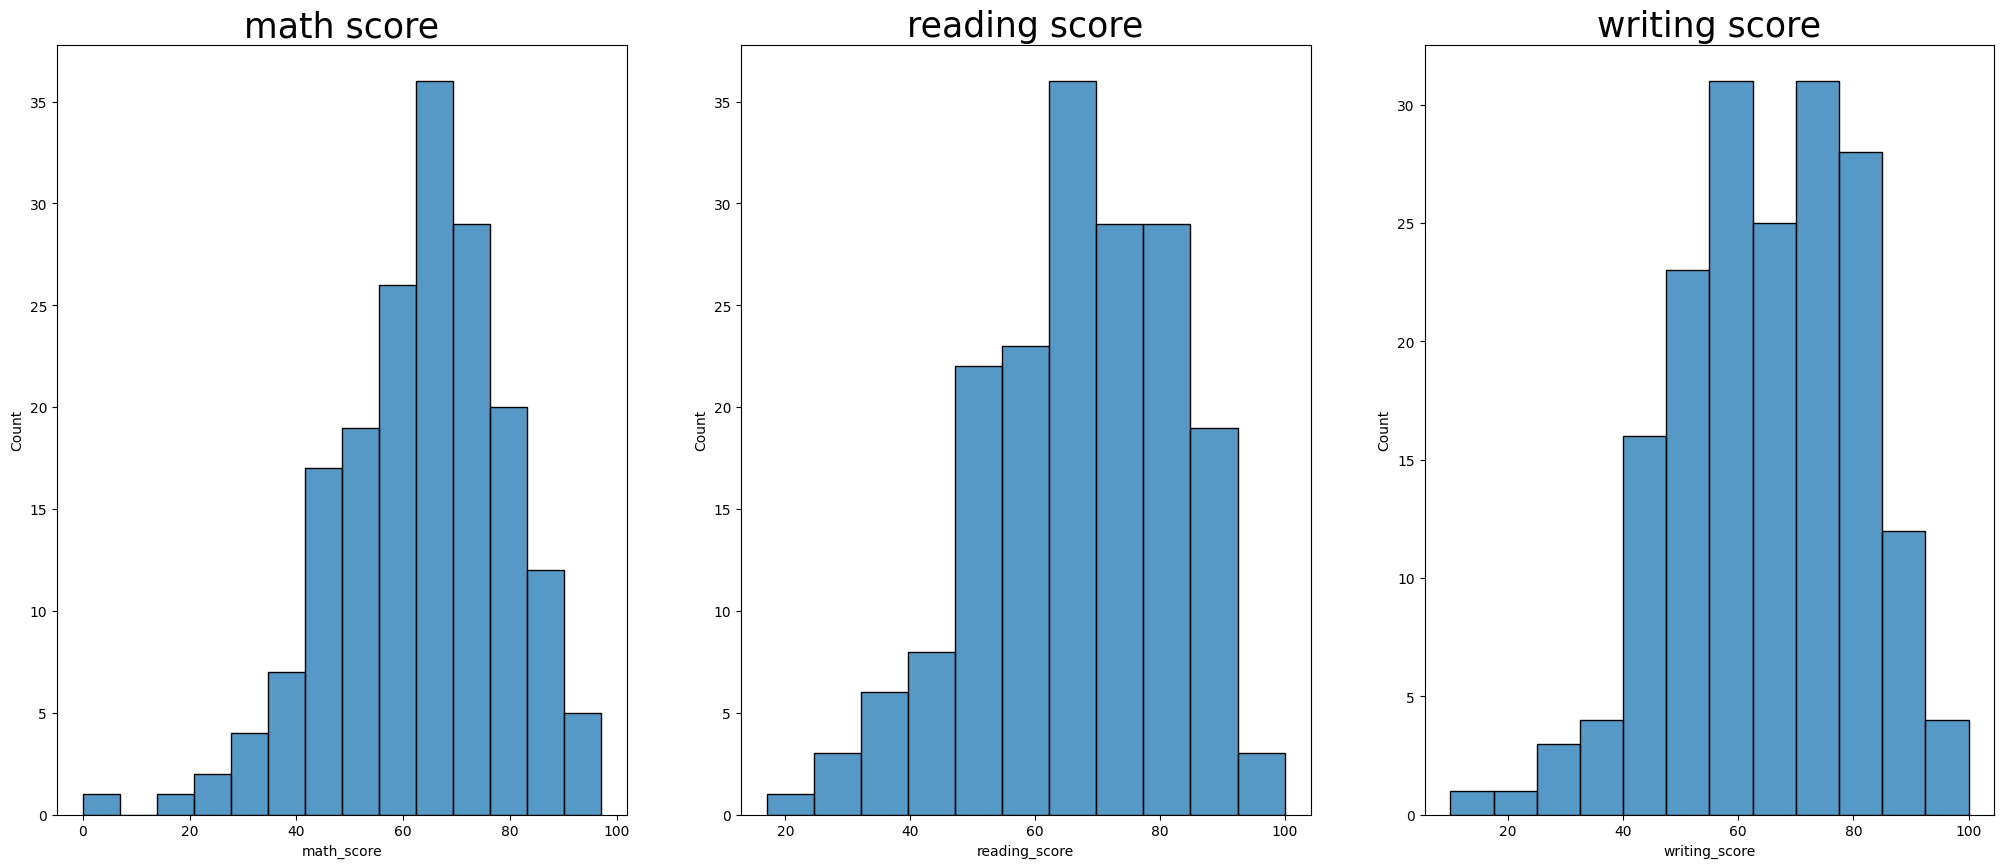

In [140]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(some_school['math_score'],ax=ax[0])
ax[0].set_title('math score',fontsize=25)
sns.histplot(some_school['reading_score'],ax=ax[1])
ax[1].set_title('reading score',fontsize=25)
sns.histplot(some_school['writing_score'],ax=ax[2])
ax[2].set_title('writing score',fontsize=25)
plt.show()

## bachelor's degree

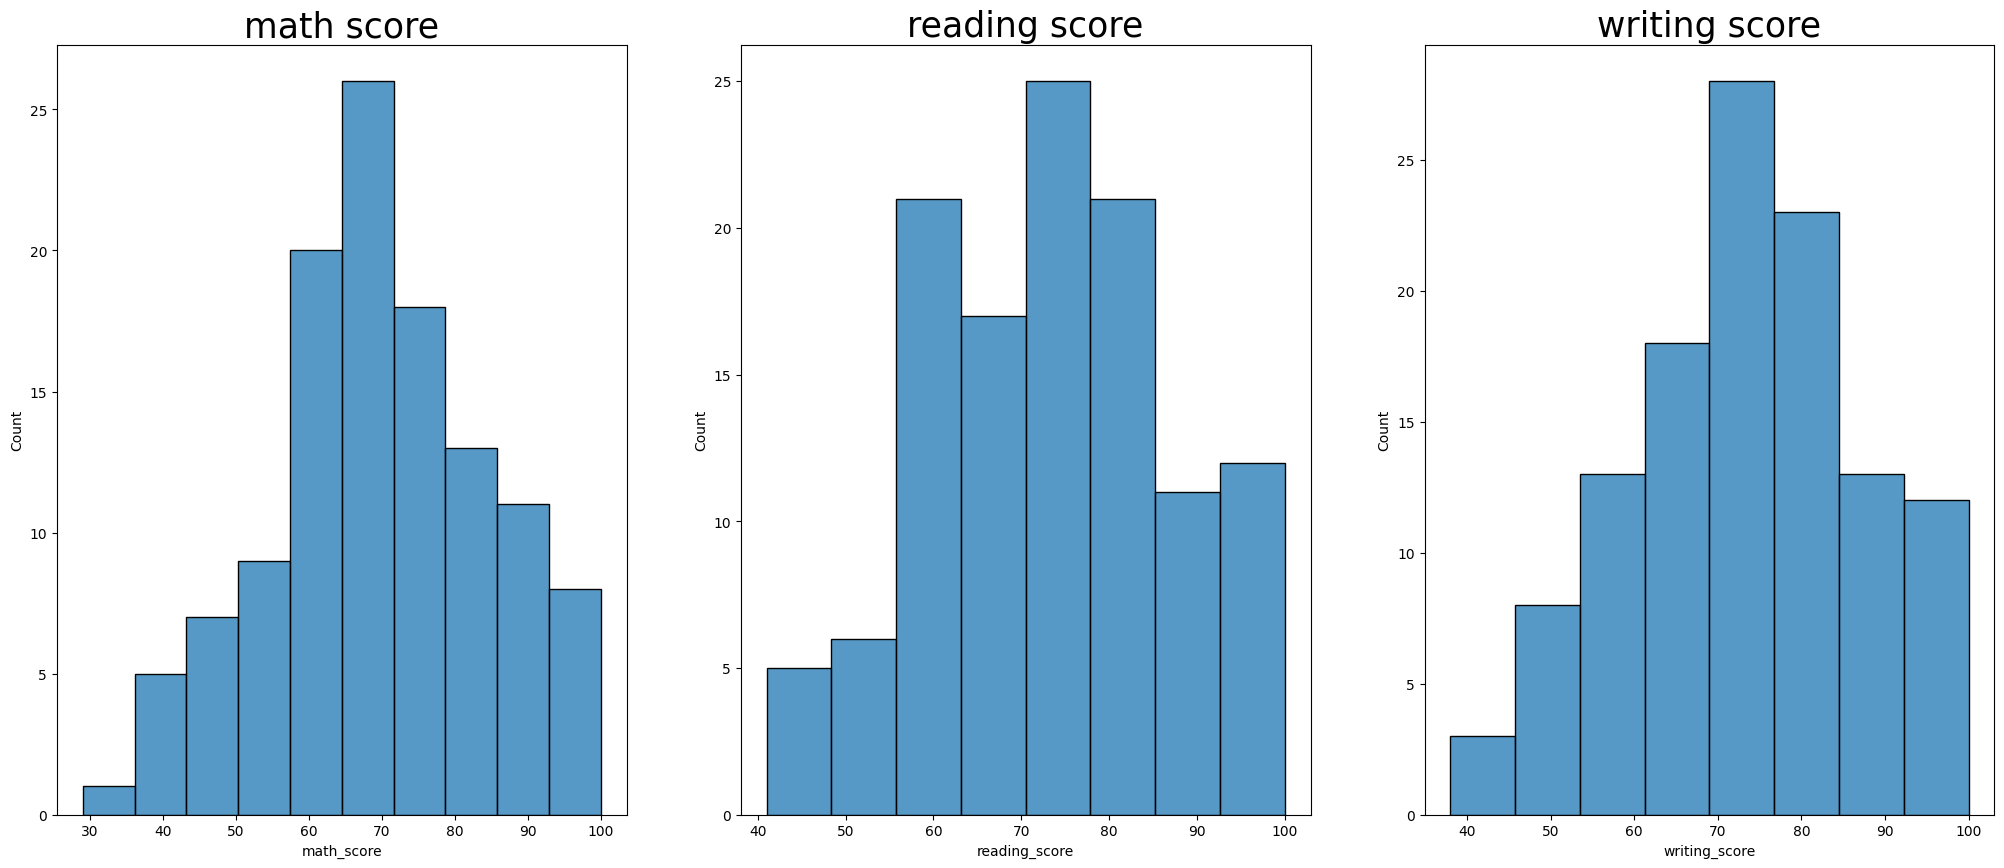

In [141]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(bachelor['math_score'],ax=ax[0])
ax[0].set_title('math score',fontsize=25)
sns.histplot(bachelor['reading_score'],ax=ax[1])
ax[1].set_title('reading score',fontsize=25)
sns.histplot(bachelor['writing_score'],ax=ax[2])
ax[2].set_title('writing score',fontsize=25)
plt.show()

## master's degree

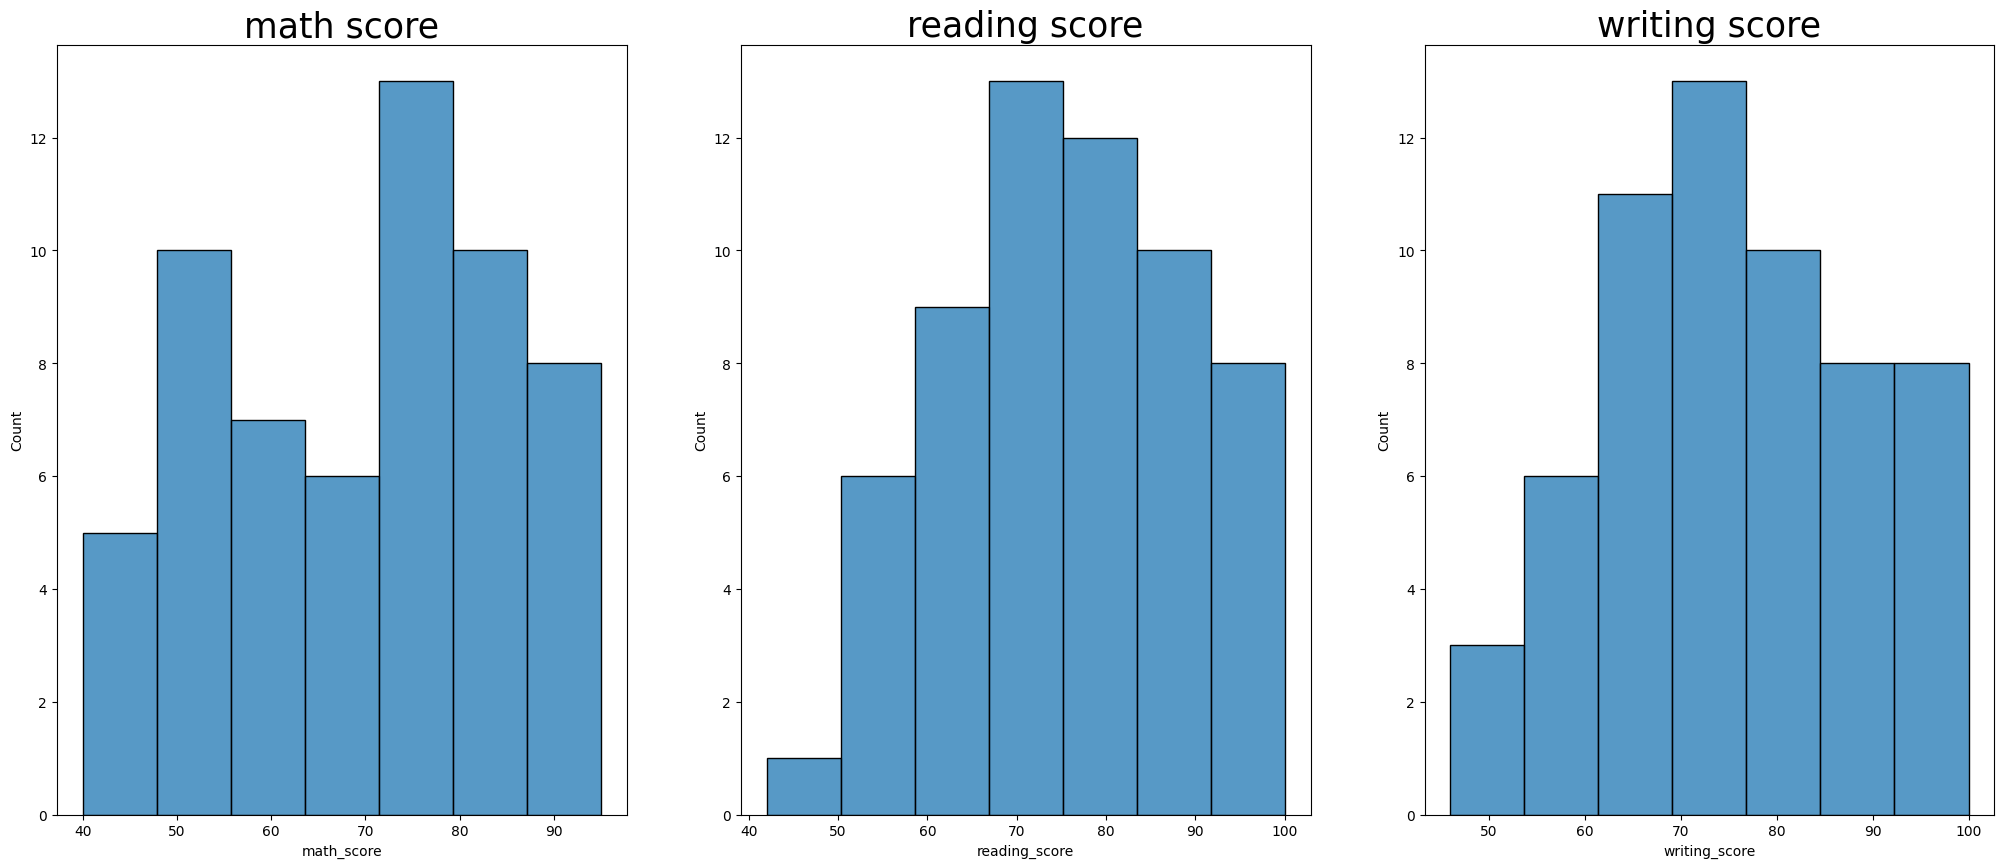

In [142]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(master['math_score'],ax=ax[0])
ax[0].set_title('math score',fontsize=25)
sns.histplot(master['reading_score'],ax=ax[1])
ax[1].set_title('reading score',fontsize=25)
sns.histplot(master['writing_score'],ax=ax[2])
ax[2].set_title('writing score',fontsize=25)
plt.show()

## LUNCH

In [143]:
lunch_collage = some_collage['lunch'].value_counts()
lunch_degree = degree['lunch'].value_counts()
lunch_high = high_school['lunch'].value_counts()
lunch_some = some_school['lunch'].value_counts()
lunch_bachelor = bachelor['lunch'].value_counts()
lunch_master = master['lunch'].value_counts()

In [144]:
print('BASED ON SOME COLLEGE')
print(lunch_collage)
print('\n')
print('BASED ON ASSOSIATES DEGREE')
print(lunch_degree)
print('\n')
print('BASED ON HIGH SCHOOL')
print(lunch_high)
print('\n')
print('BASED ON SOME HIGH SCHOOL')
print(lunch_some)
print('\n')
print('BASED ON BACHELORS DEGREE')
print(lunch_bachelor)
print('BASED ON MASTER DEGREE')
print(lunch_master)

BASED ON SOME COLLEGE
lunch
standard        147
free/reduced     79
Name: count, dtype: int64


BASED ON ASSOSIATES DEGREE
lunch
standard        145
free/reduced     77
Name: count, dtype: int64


BASED ON HIGH SCHOOL
lunch
standard        126
free/reduced     70
Name: count, dtype: int64


BASED ON SOME HIGH SCHOOL
lunch
standard        118
free/reduced     61
Name: count, dtype: int64


BASED ON BACHELORS DEGREE
lunch
standard        74
free/reduced    44
Name: count, dtype: int64
BASED ON MASTER DEGREE
lunch
standard        35
free/reduced    24
Name: count, dtype: int64


## TEST PEPARATION

In [145]:
by_collage = some_collage['test_preparation_course'].value_counts().reset_index()
by_degree= degree['test_preparation_course'].value_counts().reset_index()
by_high = high_school['test_preparation_course'].value_counts().reset_index()
by_some =some_school['test_preparation_course'].value_counts().reset_index()
by_bachelor = bachelor['test_preparation_course'].value_counts().reset_index()
by_master =master['test_preparation_course'].value_counts().reset_index()

In [146]:
print('1. BASED ON SOME COLLEGE')
print(by_collage)
print('\n')
print('2. BASED ON ASSOSIATES DEGREE')
print(by_degree)
print('\n')
print('3. BASED ON HIGH SCHOOL')
print(by_high)
print('\n')
print('4. BASED ON SOME HIGH SCHOOL')
print(by_some)
print('\n')
print('5. BASED ON BACHELORS DEGREE')
print(by_bachelor)
print('\n')
print('6. BASED ON MASTER DEGREE')
print(by_master)

1. BASED ON SOME COLLEGE
  test_preparation_course  count
0                    none    149
1               completed     77


2. BASED ON ASSOSIATES DEGREE
  test_preparation_course  count
0                    none    140
1               completed     82


3. BASED ON HIGH SCHOOL
  test_preparation_course  count
0                    none    140
1               completed     56


4. BASED ON SOME HIGH SCHOOL
  test_preparation_course  count
0                    none    102
1               completed     77


5. BASED ON BACHELORS DEGREE
  test_preparation_course  count
0                    none     72
1               completed     46


6. BASED ON MASTER DEGREE
  test_preparation_course  count
0                    none     39
1               completed     20


# 4. Based On LUNCH

In [147]:
by_standard = df.loc[(df['lunch']=='standard')]
by_free = df.loc[(df['lunch']=='free/reduced')]

## STANDARD

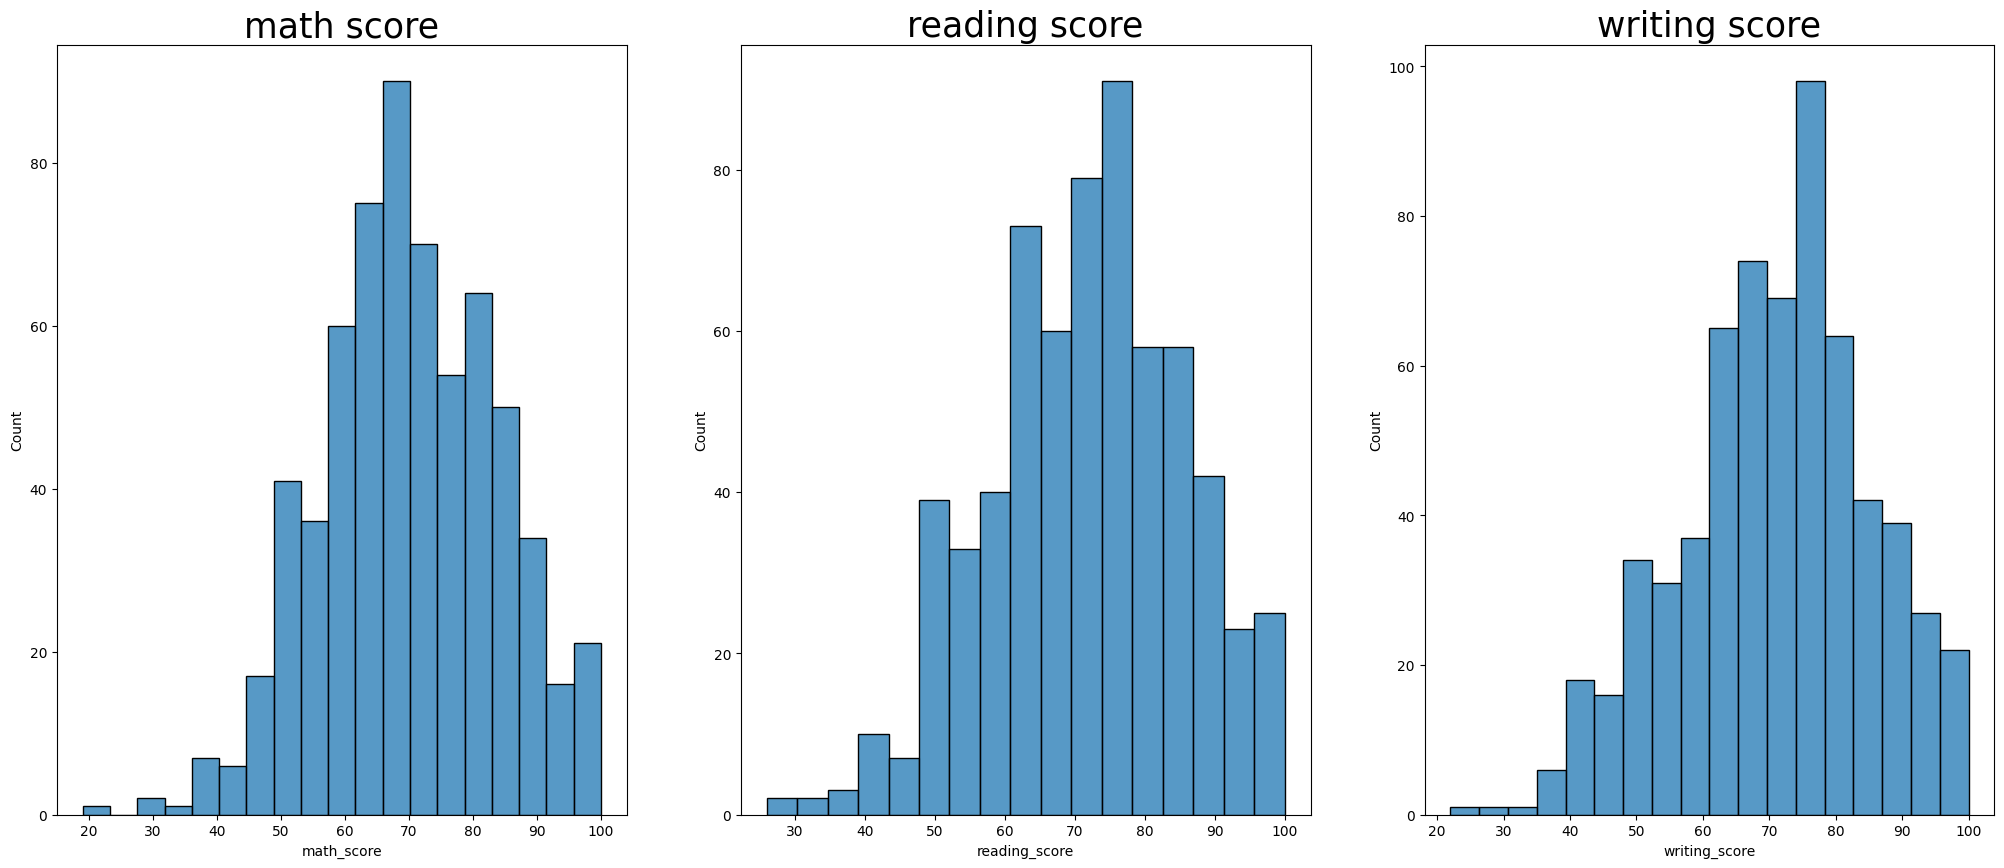

In [148]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(by_standard['math_score'],ax=ax[0])
ax[0].set_title('math score',fontsize=25)
sns.histplot(by_standard['reading_score'],ax=ax[1])
ax[1].set_title('reading score',fontsize=25)
sns.histplot(by_standard['writing_score'],ax=ax[2])
ax[2].set_title('writing score',fontsize=25)
plt.show()

## FREE/REDUCED

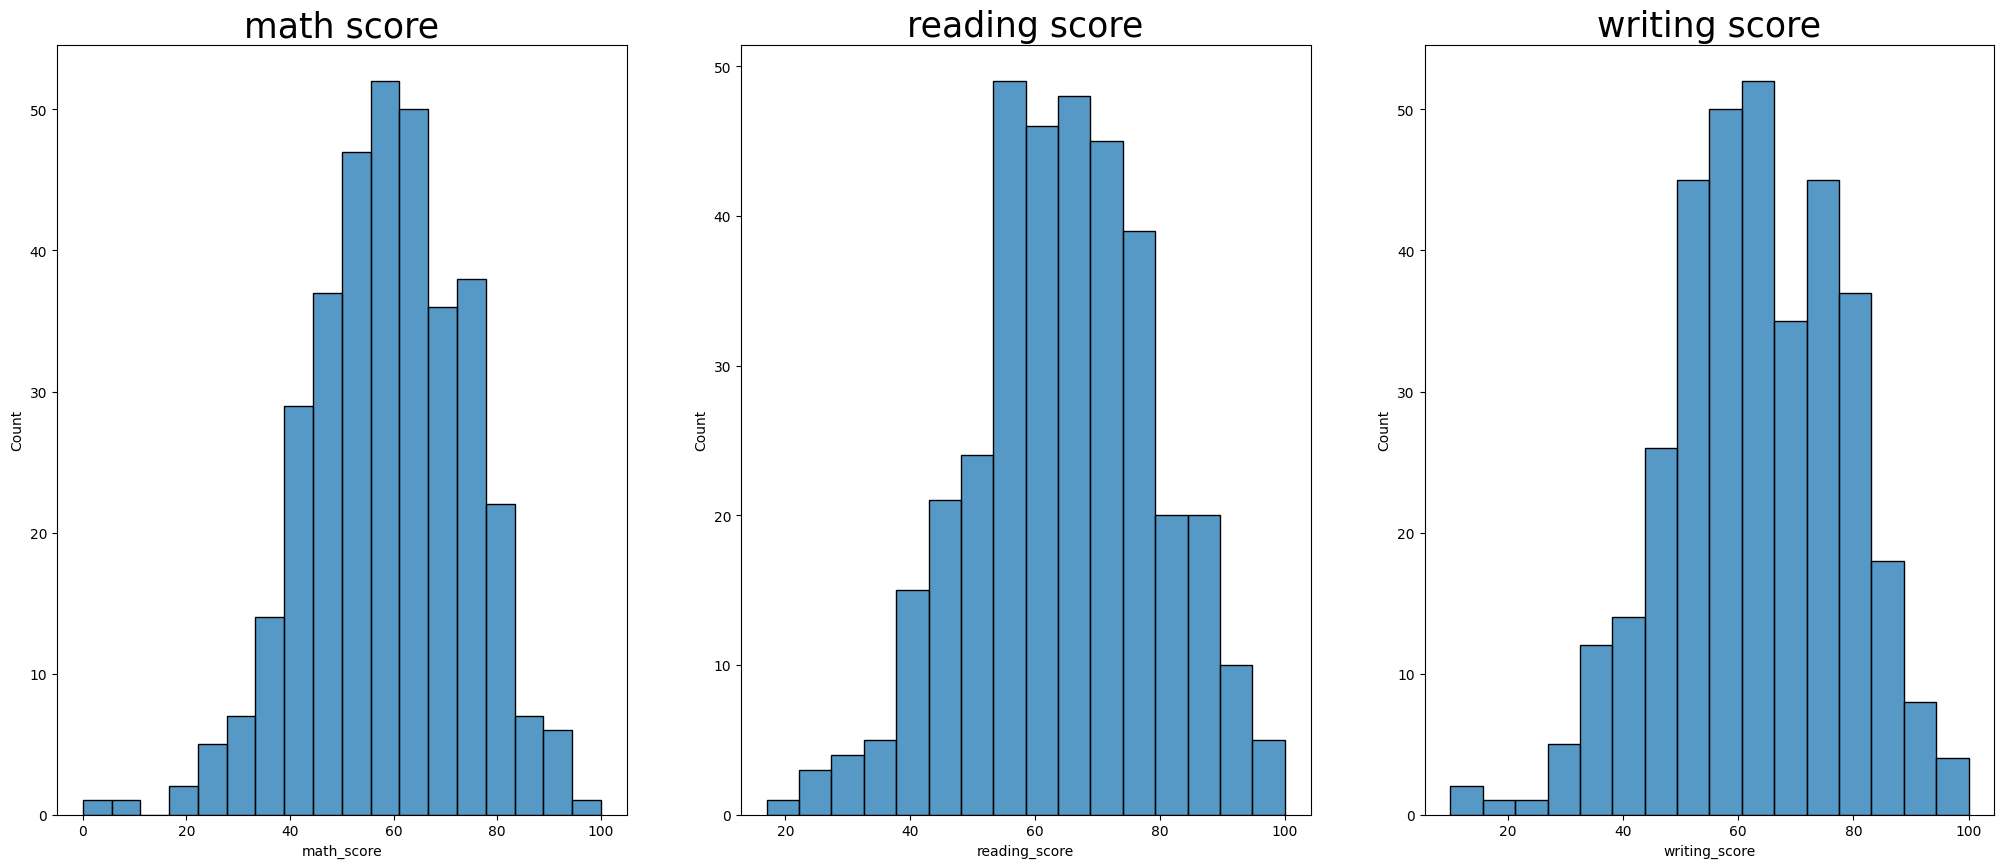

In [149]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(25,10))
sns.histplot(by_free['math_score'],ax=ax[0])
ax[0].set_title('math score',fontsize=25)
sns.histplot(by_free['reading_score'],ax=ax[1])
ax[1].set_title('reading score',fontsize=25)
sns.histplot(by_free['writing_score'],ax=ax[2])
ax[2].set_title('writing score',fontsize=25)
plt.show()

## TEST PREPARATION COURSE

## STANDARD

In [150]:
test_standard = by_standard['test_preparation_course'].value_counts().reset_index()
test_free = by_free['test_preparation_course'].value_counts().reset_index()

BASED ON STANDARD
  test_preparation_course  count
0                    none    418
1               completed    227


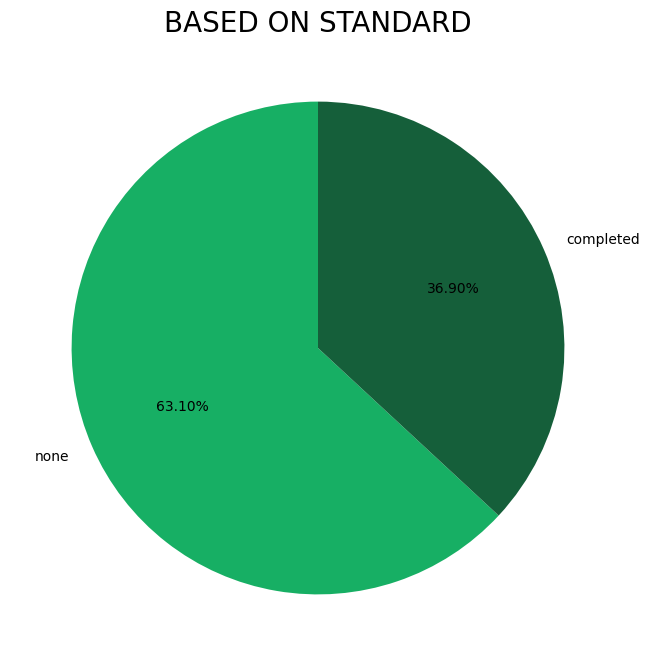

In [151]:
print('BASED ON STANDARD')
plt.figure(figsize=(10,8))
plt.pie(test_free['count'],labels=test_free['test_preparation_course'],
       startangle=90,autopct='%1.2f%%',
       colors=['#17AF64','#155F3A'])
plt.title('BASED ON STANDARD',fontsize=20)
print(test_standard)
plt.show()

## FREE/REDUCED

BASED ON FREE/REDUCED
  test_preparation_course  count
0                    none    224
1               completed    131


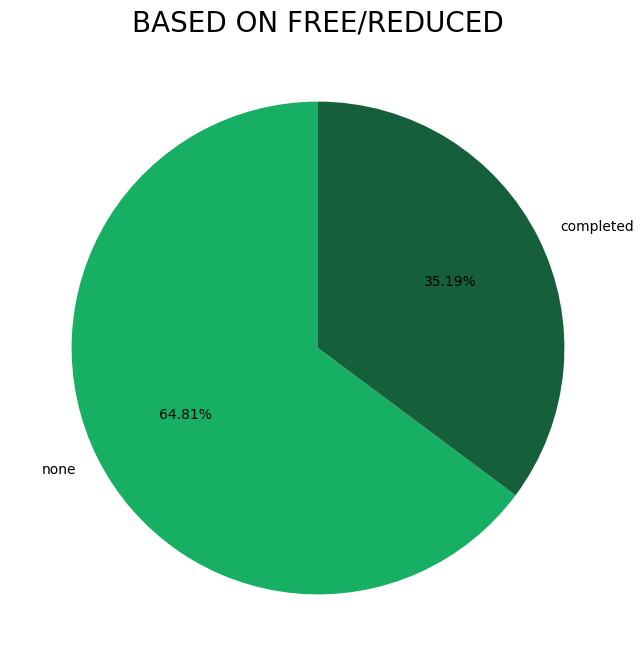

In [152]:
print('BASED ON FREE/REDUCED')
print(test_free)
plt.figure(figsize=(10,8))
plt.pie(test_standard['count'],labels=test_standard['test_preparation_course'],
       startangle=90,autopct='%1.2f%%',
       colors=['#17AF64','#155F3A'])
plt.title('BASED ON FREE/REDUCED',fontsize=20)
plt.show()

# KESIMPULAN

1. **Cara Meningkatkan Kinerja Siswa dalam Setiap Tes:**
   Berdasarkan analisis data, meskipun tidak ada faktor tunggal yang signifikan, terdapat beberapa variabel yang berpotensi mempengaruhi kinerja siswa. Untuk meningkatkan kinerja siswa, Anda dapat mempertimbangkan pendekatan berikut:
   - Melakukan evaluasi individual untuk mengidentifikasi kelemahan siswa dalam masing-masing mata pelajaran dan memberikan bantuan tambahan sesuai kebutuhan.
   - Mengembangkan program persiapan ujian yang komprehensif dengan fokus pada materi kunci yang diujikan.
   - Mendorong partisipasi dalam program persiapan ujian, mengingat bahwa siswa yang mengikuti persiapan cenderung memiliki skor yang lebih tinggi.

2. **Faktor Utama yang Mempengaruhi Nilai Ujian:**
   Meskipun analisis menunjukkan bahwa tidak ada faktor tunggal yang dominan, beberapa faktor yang perlu diperhatikan dalam memahami nilai ujian siswa adalah:
   - Tingkat persiapan siswa: Siswa yang mengikuti persiapan ujian cenderung memiliki skor yang lebih tinggi.
   - Kelompok etnis: Terdapat perbedaan skor antara kelompok etnis, meskipun tidak signifikan. Hal ini menunjukkan pentingnya menghormati dan mendukung keragaman budaya dalam proses pembelajaran.
   - Jenis makan siang: Tidak ada perbedaan signifikan dalam distribusi skor berdasarkan jenis makan siang.

3. **Efektivitas Kursus Persiapan Ujian:**
   Analisis menunjukkan bahwa siswa yang mengikuti kursus persiapan ujian cenderung memiliki skor yang lebih tinggi. Namun, untuk menilai efektivitas kursus secara lebih rinci, Anda dapat mempertimbangkan langkah-langkah berikut:
   - Melakukan studi lanjutan untuk mengukur peningkatan skor sebelum dan setelah mengikuti kursus.
   - Menganalisis elemen-elemen spesifik dalam kursus yang paling berkontribusi pada peningkatan skor siswa.
   - Mengumpulkan umpan balik dari siswa yang telah mengikuti kursus untuk memahami pengalaman mereka dan area perbaikan.

4. **Kesimpulan Lainnya:**
   Berdasarkan analisis data, dapat disimpulkan bahwa dalam konteks ini, tidak ada faktor tunggal yang secara signifikan mempengaruhi skor matematika, membaca, dan menulis siswa. Meskipun demikian, distribusi skor menunjukkan pola tertentu berdasarkan kelompok etnis dan partisipasi dalam program persiapan ujian. Penting untuk mencatat bahwa faktor-faktor luar seperti motivasi, dukungan keluarga, dan faktor psikologis juga dapat berkontribusi pada hasil akademik, meskipun tidak secara eksplisit diidentifikasi dalam analisis ini.

# REKOMENDASI

1. **Peningkatan Persiapan Ujian:**
   Meskipun perbedaannya tidak signifikan, siswa yang mengikuti persiapan ujian cenderung memiliki skor yang sedikit lebih tinggi. Oleh karena itu, disarankan agar sekolah dapat lebih mendorong siswa untuk aktif mengikuti program persiapan ujian guna membantu mereka mempersiapkan diri dengan lebih baik.

2. **Pemantauan Kelompok Etnis:**
   Terdapat perbedaan dalam skor rata-rata antara kelompok etnis. Meskipun perbedaannya tidak drastis, sekolah dapat melakukan pemantauan lebih lanjut terhadap kelompok-kelompok ini. Mungkin ada faktor-faktor spesifik yang mempengaruhi performa siswa dari kelompok tertentu, sehingga intervensi atau dukungan tambahan dapat diberikan jika diperlukan.

3. **Perhatian pada Siswa Kelompok A:**
   Kelompok A memiliki skor rata-rata yang lebih rendah dibandingkan kelompok-kelompok lain. Sekolah dapat memfokuskan upaya tambahan untuk memberikan dukungan akademik kepada siswa dalam kelompok ini, seperti program bimbingan atau tutoring.

4. **Keterlibatan Orang Tua:**
   Meskipun tidak terlihat korelasi yang jelas antara tingkat pendidikan orang tua dan skor siswa, melibatkan orang tua dalam mendukung pembelajaran anak tetap penting. Sekolah bisa merencanakan sesi informasi, seminar, atau workshop untuk orang tua guna membantu mereka mendukung perkembangan akademik anak-anak mereka.

5. **Pemerataan Sumber Daya:**
   Meskipun tidak ada perbedaan besar dalam distribusi skor berdasarkan makan siang atau tingkat pendidikan orang tua, penting untuk memastikan bahwa semua siswa memiliki akses yang setara terhadap sumber daya pendidikan. Sekolah dapat memastikan bahwa program makan siang dan dukungan pendidikan tersedia untuk semua siswa, tanpa memandang latar belakang ekonomi atau pendidikan orang tua.